# Problem Statement
## Forecast the CocaCola prices.
### Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.Finally which model you will use for Forecasting.

In [77]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
sn.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error


from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt 


import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

## Data Exploration

In [7]:
df.shape

(42, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
df.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [10]:
# Find unique data of every feature
df.nunique()

Quarter    42
Sales      42
dtype: int64

In [11]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Feature Engineering

### Convert quarters into years

In [13]:
df['Quarter_Year']=df['Quarter'].str.split('_').apply(lambda x:' 19' .join (x[:]))
df.head()

Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987

### Now, we Convert Quarter year into Date:

In [14]:
df['Date']=(pd.to_datetime(df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df.head()

Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01

### Extractng the quarters and putting in column

In [16]:
df['Quarters']=0

for i in range(42):
    n=df['Quarter'][i]
    df['Quarters'][i]=n[0:2]
           
df.head()

Quarter        Sales Quarter_Year       Date Quarters
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1

In [ ]:
# creating dummy variables for quarters variable


In [20]:
q_dummy=pd.DataFrame(pd.get_dummies(df['Quarters']))
df1=pd.concat((df,q_dummy),axis=1)
df1.head()

Quarter        Sales Quarter_Year       Date Quarters  Q1  Q2  Q3  Q4
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   1   0   0   0
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   0   1   0   0
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   0   0   1   0
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   0   0   0   1
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   1   0   0   0

### Dropping the (Quarter,Quarters_Year) column

In [21]:
df1.drop(['Quarter','Quarter_Year'],axis=1,inplace=True)
df1.head()

Sales       Date Quarters  Q1  Q2  Q3  Q4
0  1734.827000 1986-01-01       Q1   1   0   0   0
1  2244.960999 1986-04-01       Q2   0   1   0   0
2  2533.804993 1986-07-01       Q3   0   0   1   0
3  2154.962997 1986-10-01       Q4   0   0   0   1
4  1547.818996 1987-01-01       Q1   1   0   0   0

### Date as Date-time index for the dataframe

In [22]:
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [23]:
df1.head()

Sales Quarters  Q1  Q2  Q3  Q4
Date                                            
1986-01-01  1734.827000       Q1   1   0   0   0
1986-04-01  2244.960999       Q2   0   1   0   0
1986-07-01  2533.804993       Q3   0   0   1   0
1986-10-01  2154.962997       Q4   0   0   0   1
1987-01-01  1547.818996       Q1   1   0   0   0

### Seperating Month and year for visualisation amd removinf meaningful insight of the data.

In [38]:
df['Date']=pd.to_datetime(df.Date,format='%b-%y')
df['Month']=df.Date.dt.strftime('%b')
df['Year']=df.Date.dt.strftime('%Y')
df.head()

Quarter        Sales Quarter_Year       Date Quarters Month  Year
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   Jan  1986
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   Apr  1986
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   Jul  1986
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   Oct  1986
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   Jan  1987

# Data Visualisations

<AxesSubplot: xlabel='Date'>

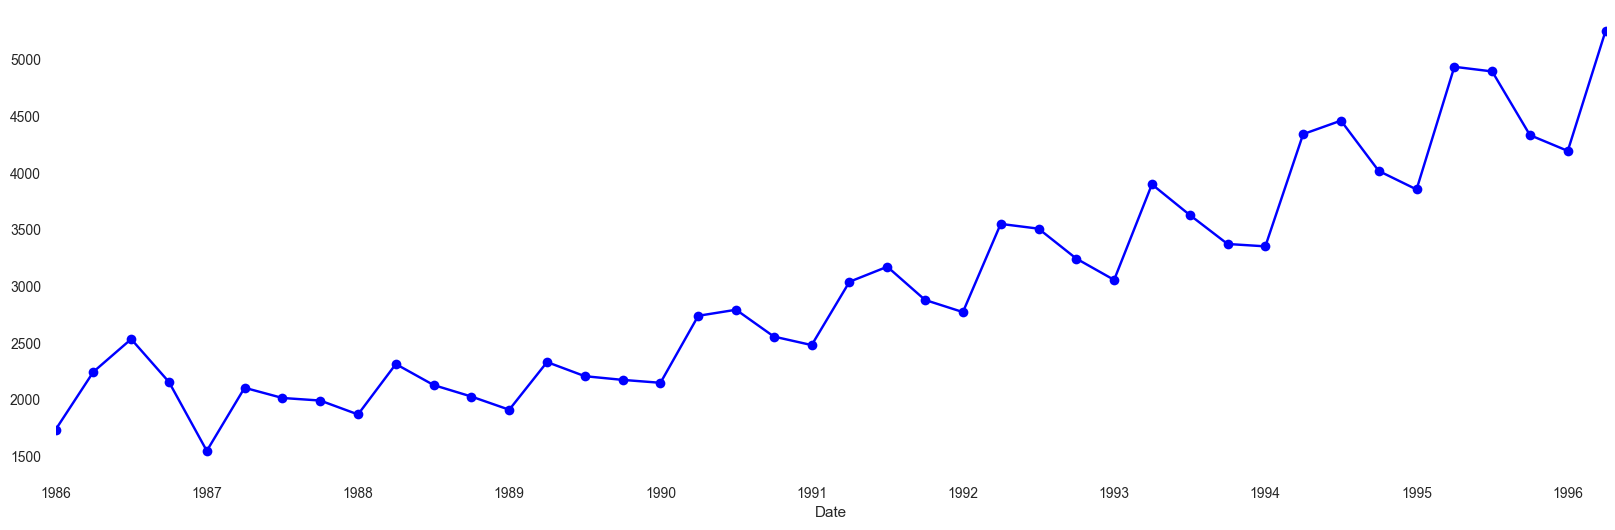

In [28]:
# Line Plot
df1['Sales'].plot(marker='o',color='blue',figsize=(20,6))

- **Trend is upward it says that sales are increaisng time by time.**

<AxesSubplot: xlabel='Month', ylabel='Year'>

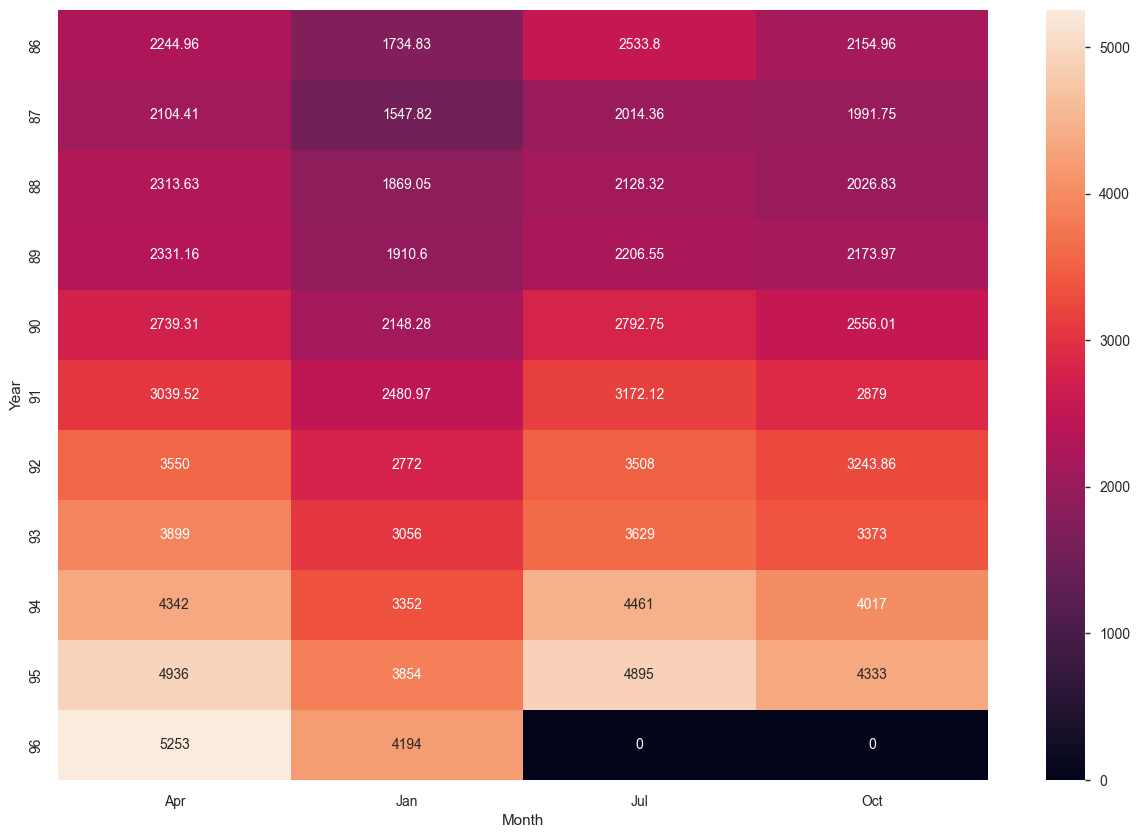

In [32]:
# Heatmap
plt.figure(figsize=(15,10))
y_m=pd.pivot_table(data=df,values='Sales',index='Year',columns='Month',aggfunc="mean",fill_value=0)
sn.heatmap(y_m,annot=True,fmt='g')


# Line plot using Quarters and sales

<AxesSubplot: xlabel='Quarters', ylabel='Sales'>

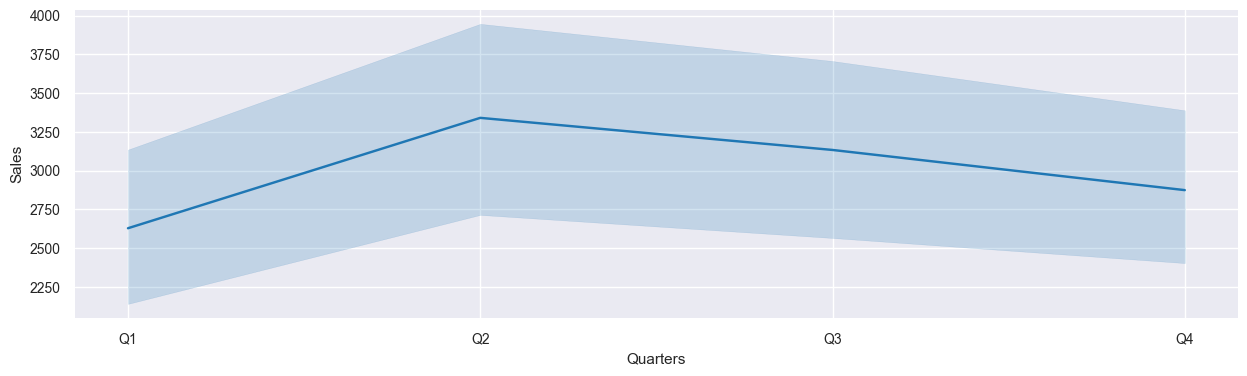

In [73]:
plt.figure(figsize=(15,4))
sn.lineplot(x='Quarters',y="Sales",data=df)

<AxesSubplot: xlabel='Year', ylabel='Sales'>

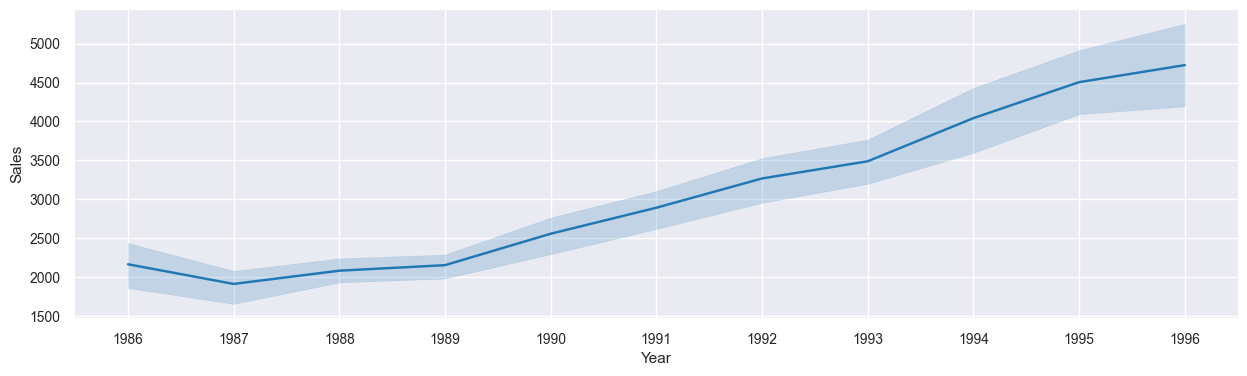

In [74]:
# Line plot using sales amd years
plt.figure(figsize=(15,4))
sn.lineplot(x='Year',y="Sales",data=df)

### Box Plot of each year month intervals

<AxesSubplot: xlabel='Year', ylabel='Sales'>

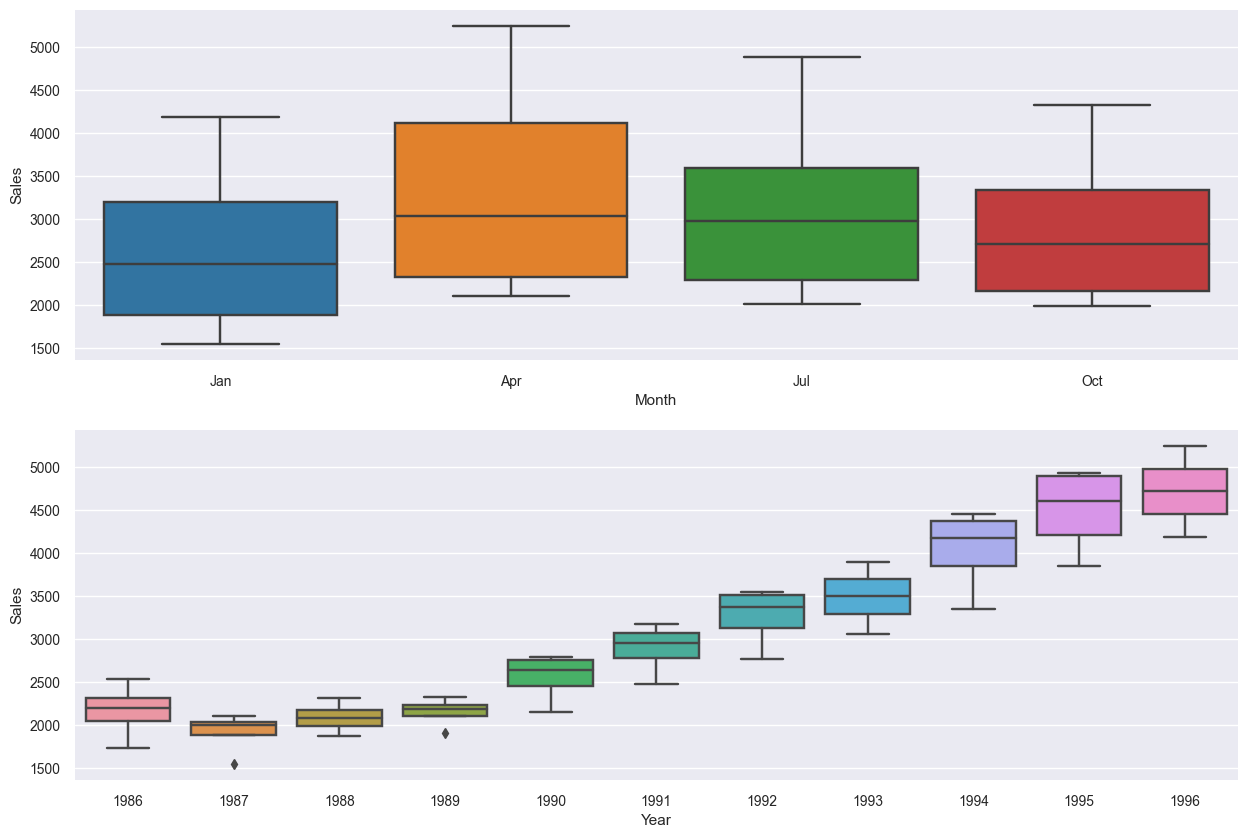

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sn.boxplot(x='Month',y="Sales",data=df)
plt.subplot(212)
sn.boxplot(x='Year',y="Sales",data=df)

<AxesSubplot: xlabel='Sales', ylabel='Density'>

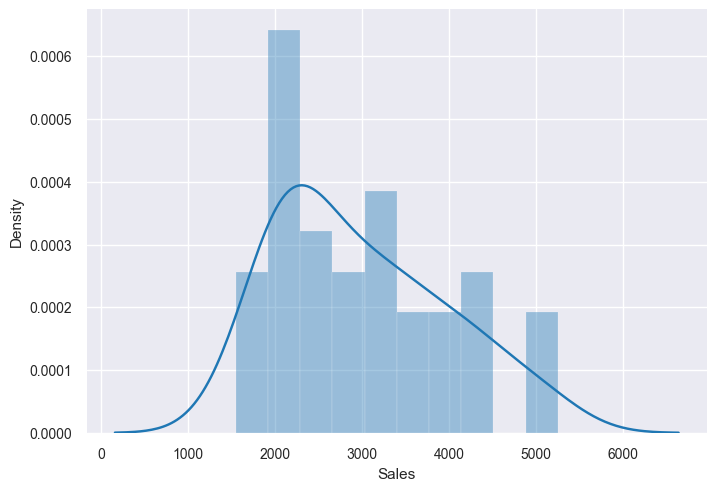

In [70]:
### distribution plot
sn.distplot(df.Sales,kde=True,bins=10)

### Lag plot

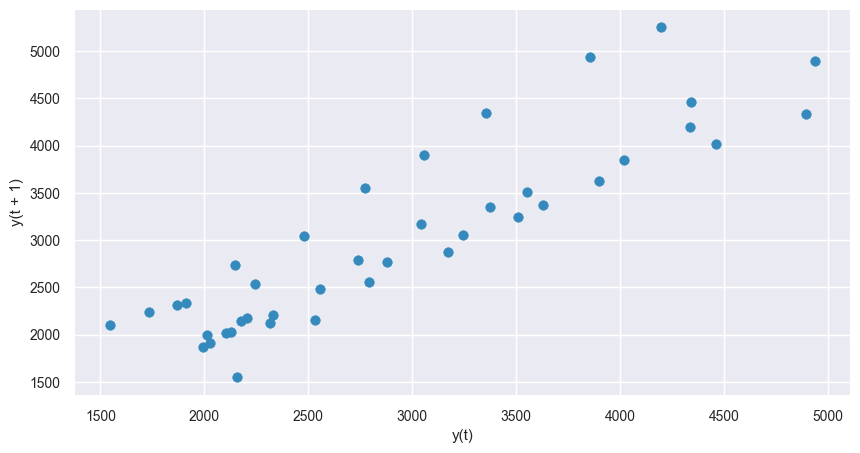

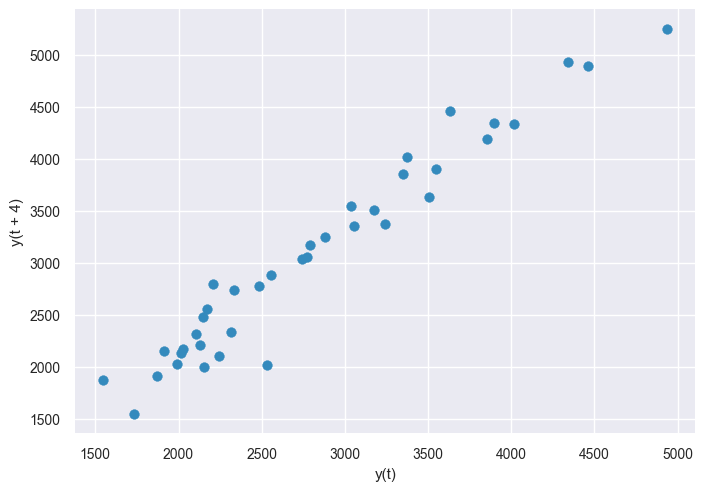

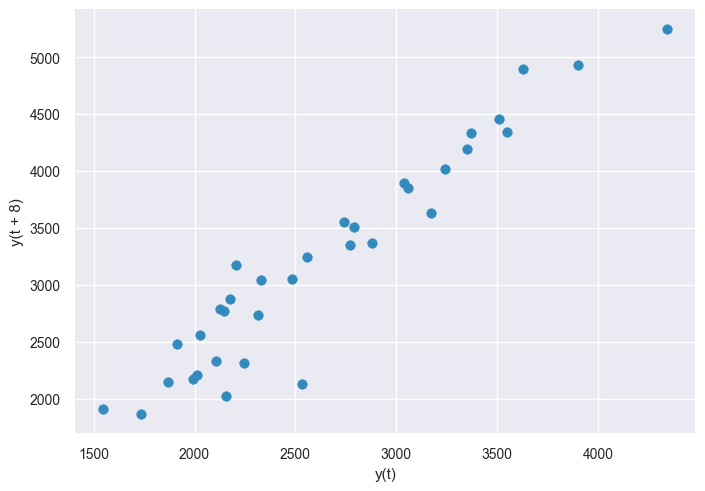

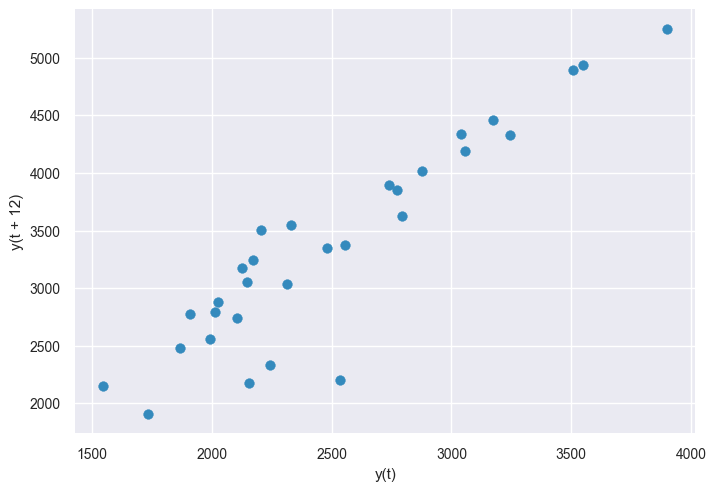

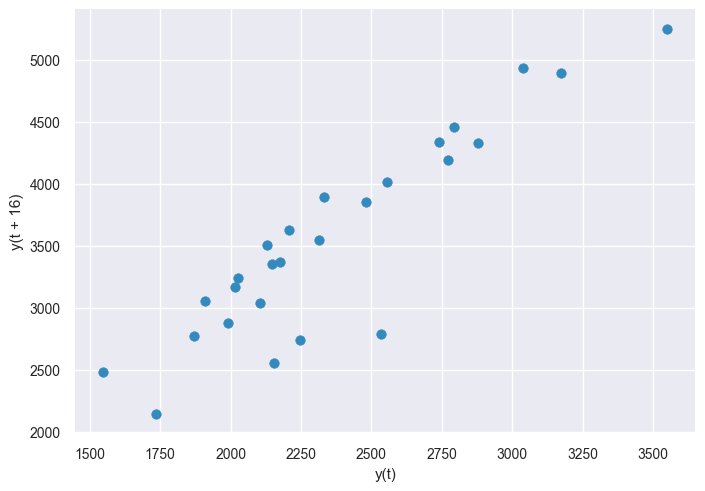

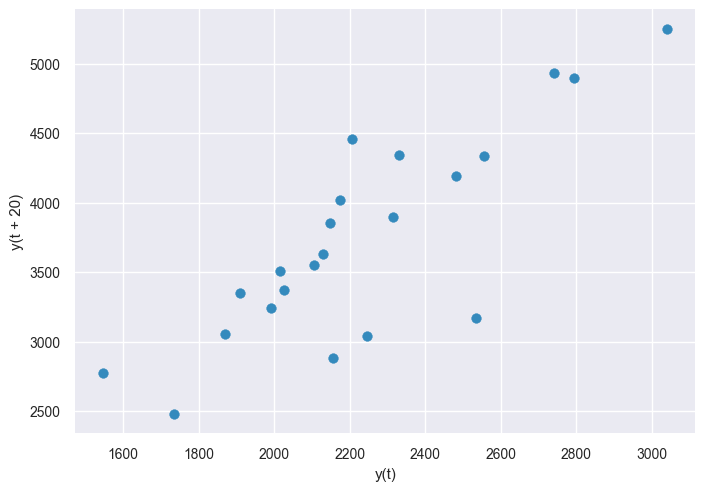

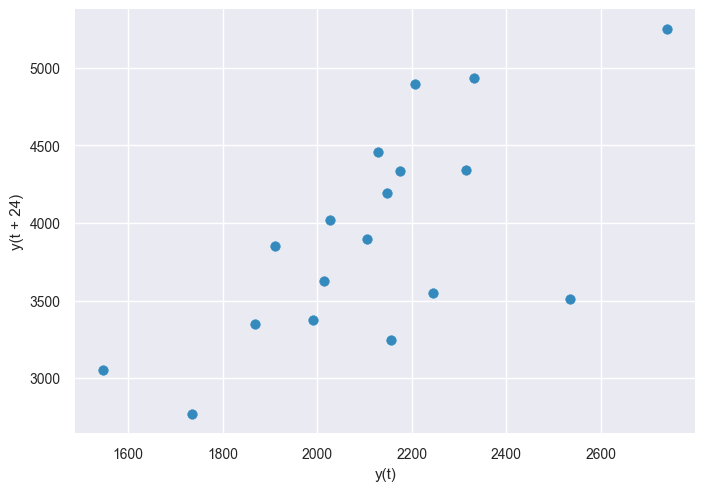

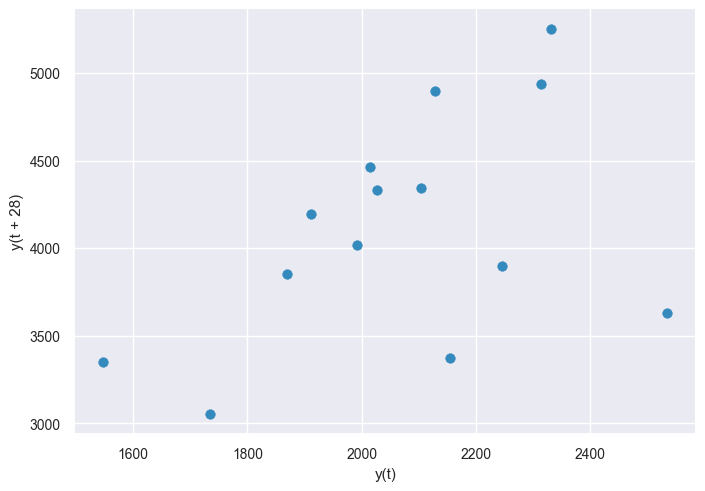

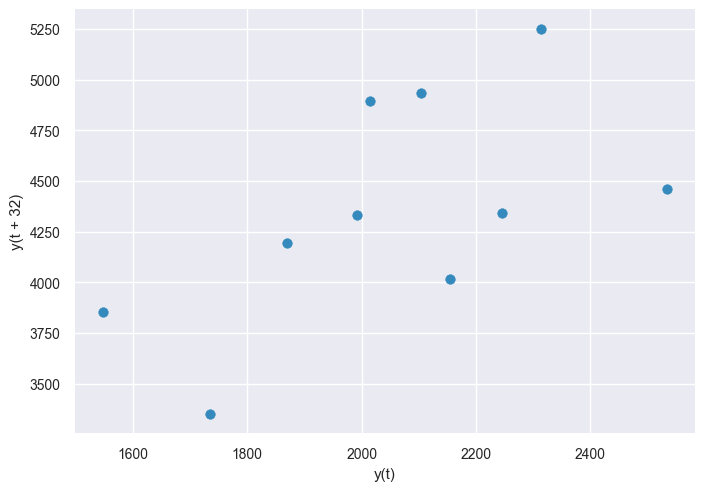

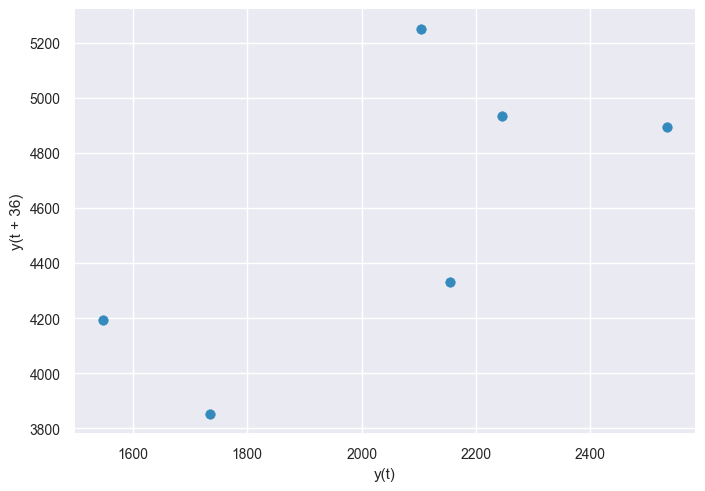

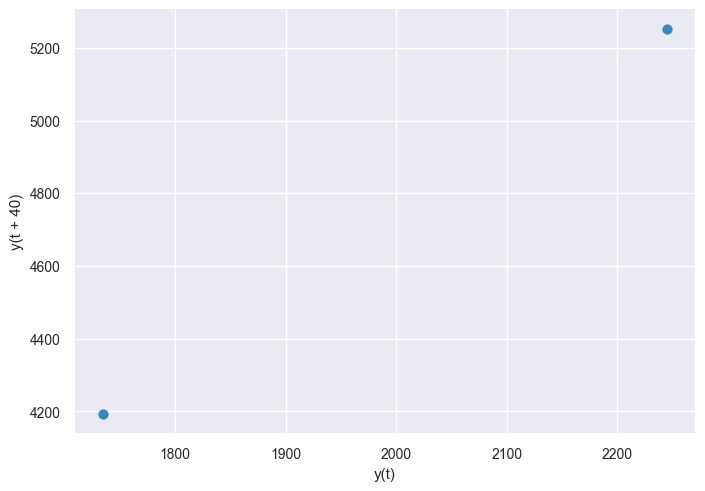

In [71]:
plt.figure(figsize=(10,5))

   
for i in [1,4,8,12,16,20,24,28,32,36,40]:
    lag_plot(df.Sales,lag=i)
    plt.show()

## Moving Average

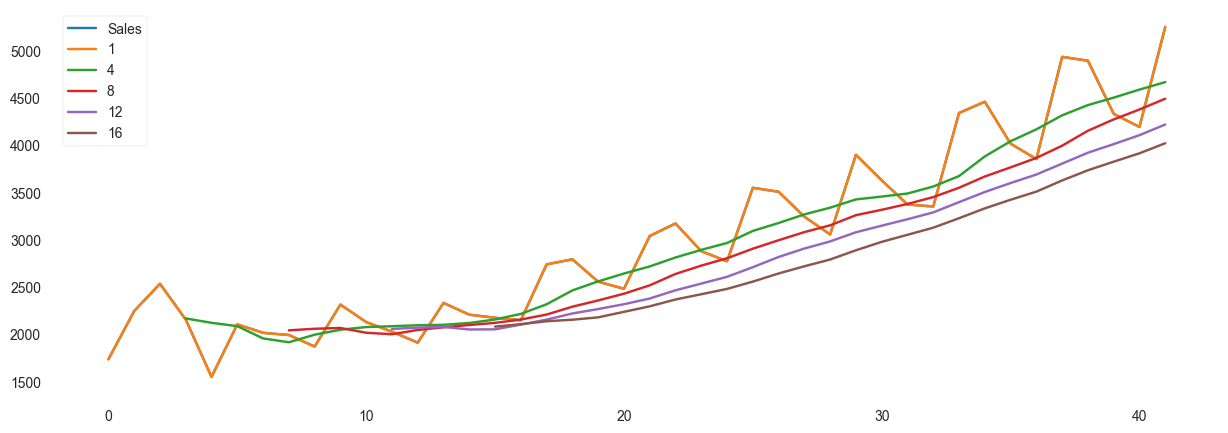

In [64]:
plt.figure(figsize=(15,5))
df['Sales'].plot()
for i in [1,4,8,12,16]:
    
    df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


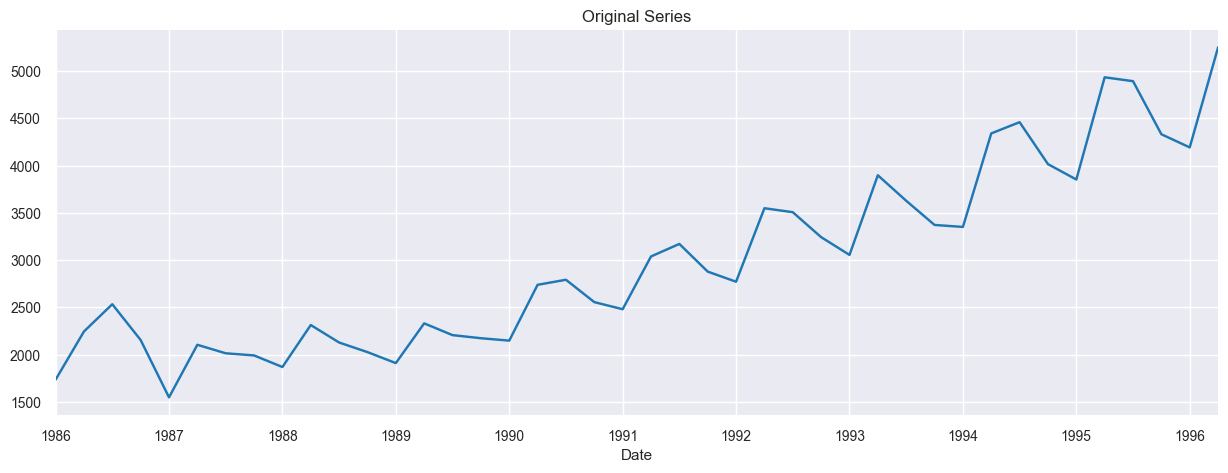

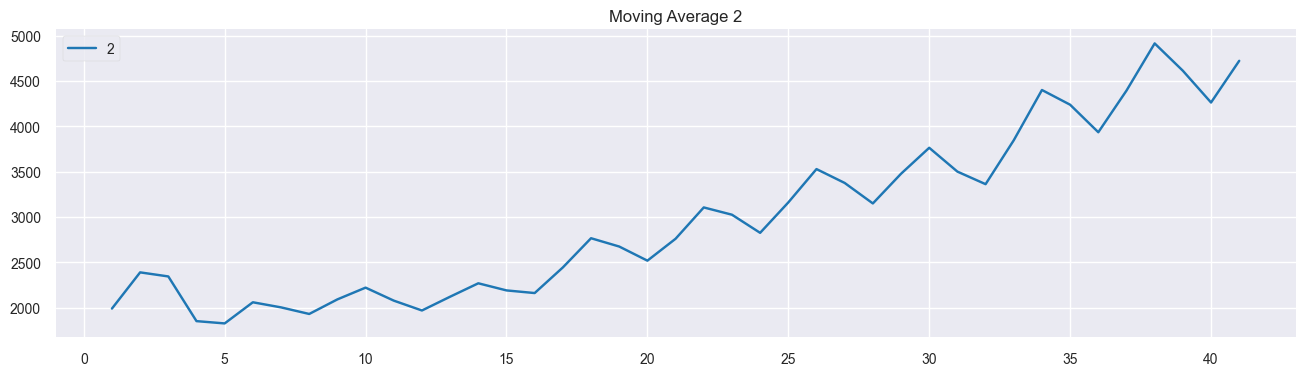

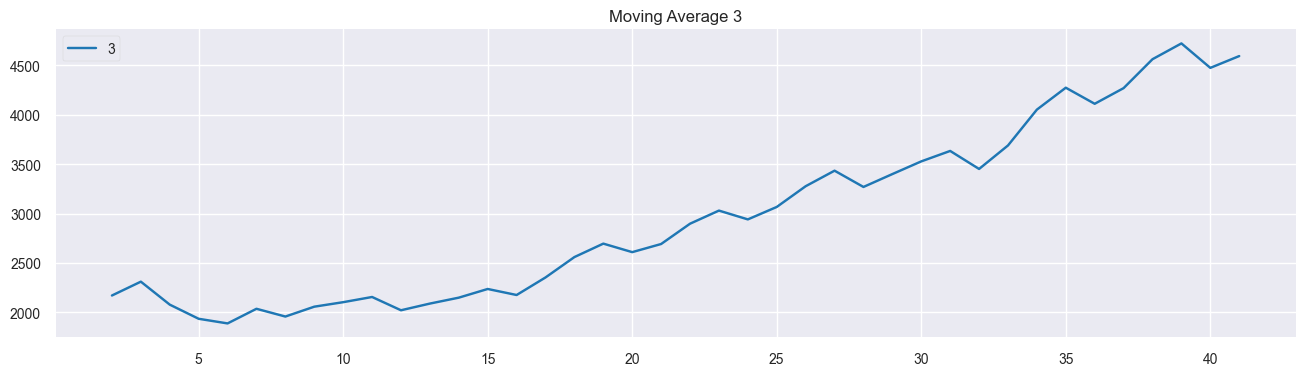

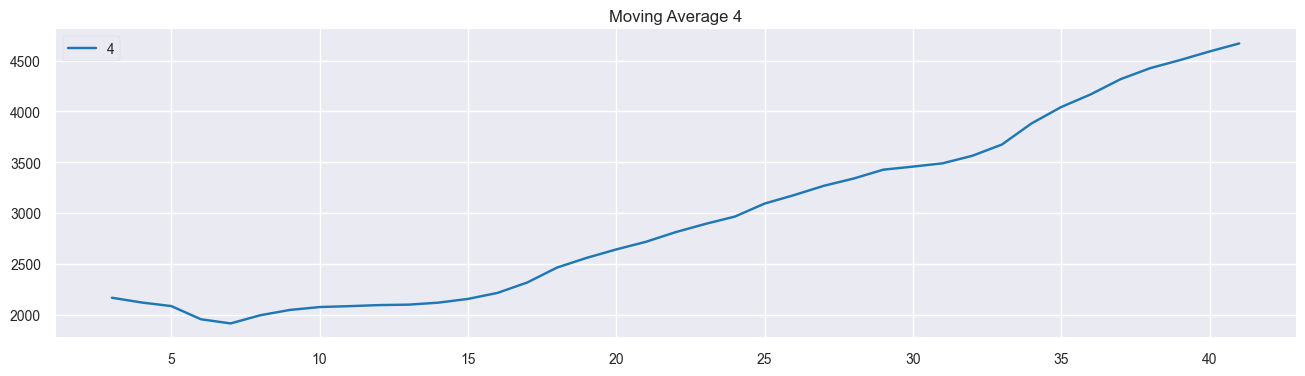

In [75]:
plt.figure(figsize=(15,5))
df1['Sales'].plot()
plt.title("Original Series")
for i in [2,3,4]:
    plt.figure(figsize=(16,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

## Time Series decomposition plot

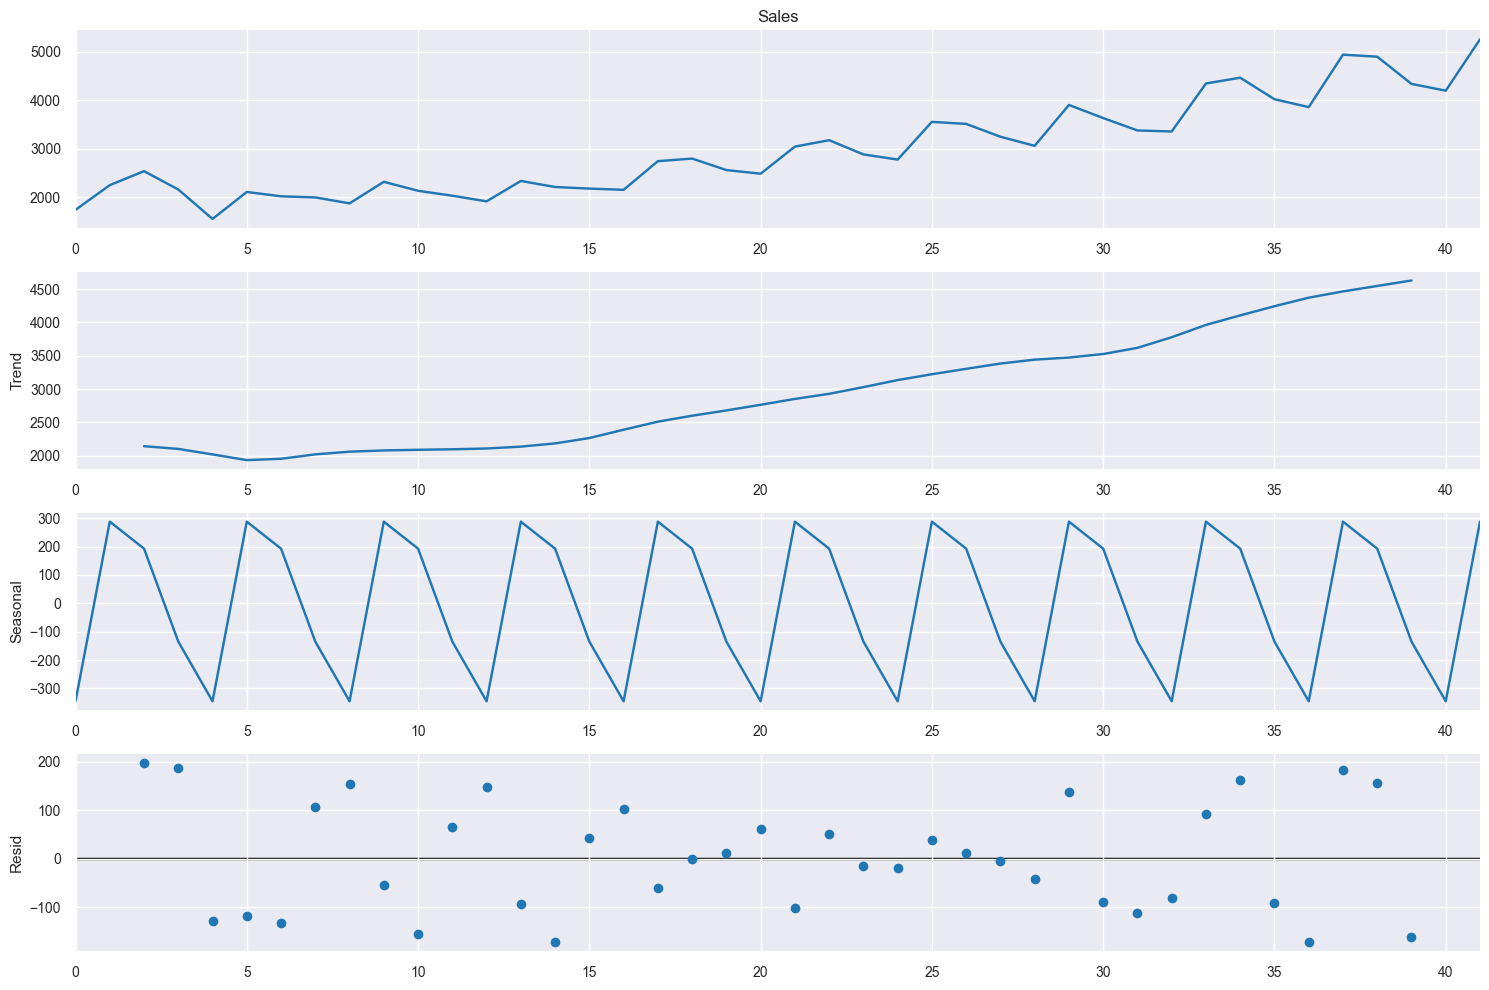

In [79]:
decompose_ts_add=seasonal_decompose(df['Sales'],period=4)
with plt.rc_context():
    plt.rc('figure',figsize=(15,10))
    decompose_ts_add.plot()
    plt.show()

## ACF Plots amd PACF plots

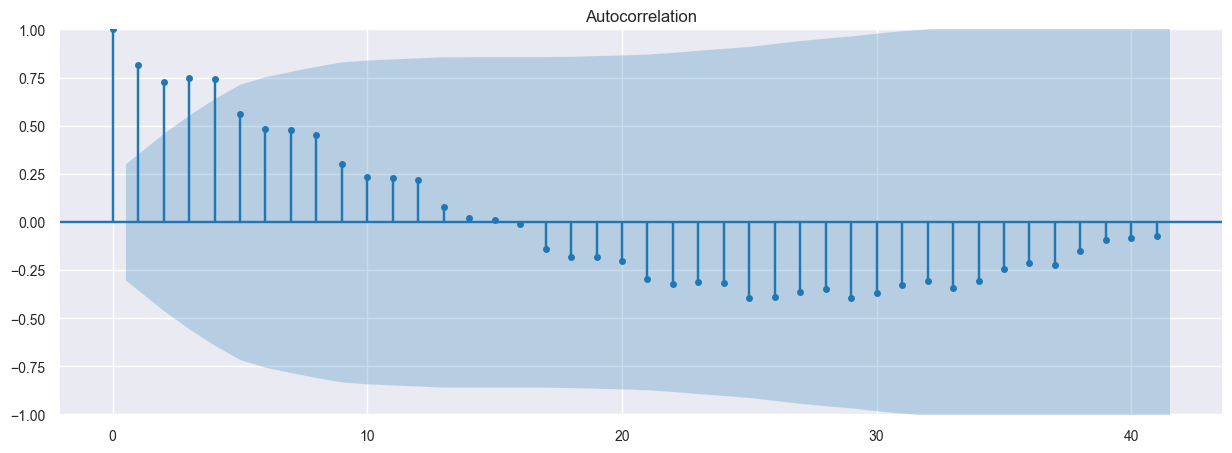

In [82]:
# ACF(Auto-Corelation Function)
import statsmodels.graphics.tsaplots as tsa_plots 
with plt.rc_context():
    plt.rc('figure',figsize=(15,5))
    tsa_plots.plot_acf(df['Sales'],lags=41)
    plt.show()


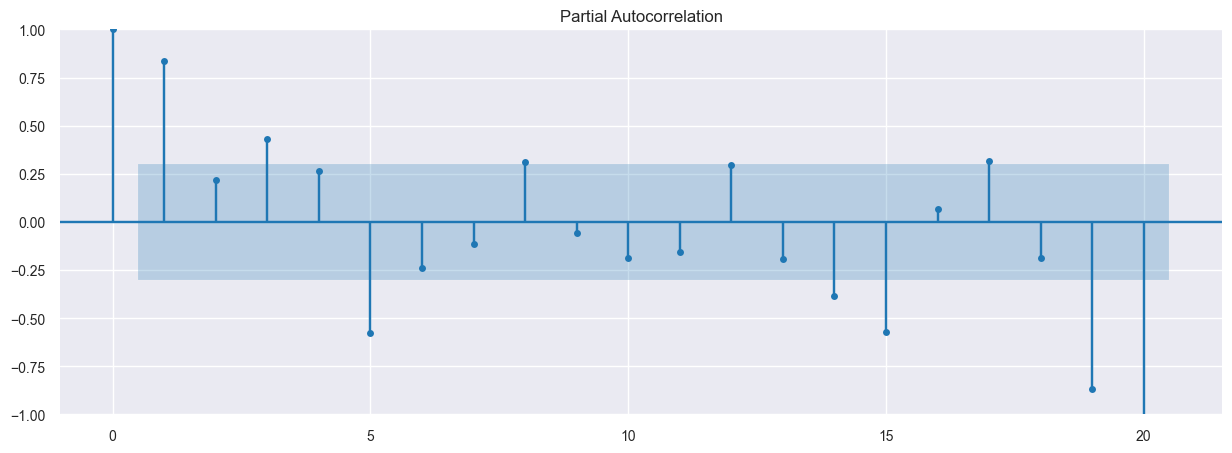

In [84]:
# Partial Autocorrelation Function (PACF)
import statsmodels.graphics.tsaplots as tsa_plots 
with plt.rc_context():
    plt.rc('figure',figsize=(15,5))
    tsa_plots.plot_pacf(df['Sales'],lags=20)
    plt.show()

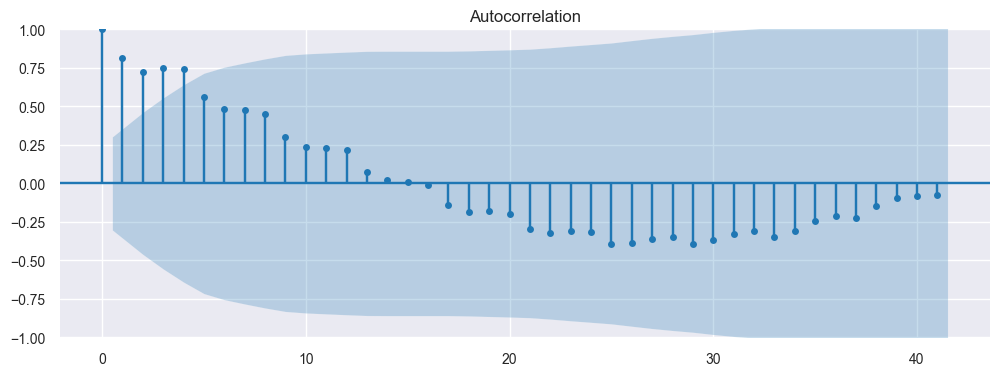

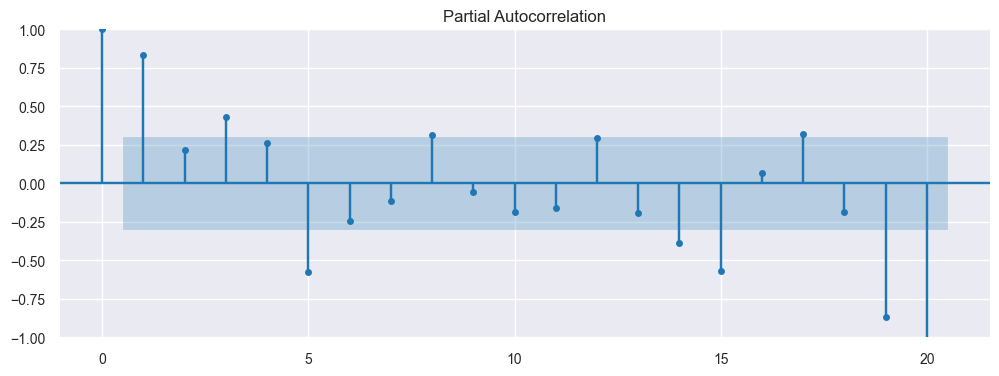

In [86]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Sales,lags=41)
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

- Autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation.
- Partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

## Sampling
### Linear Interpolation
- Now we draw a straight line which joining the next and previous points of the missing values in the data.

#### Sampling w.r.t month

In [87]:
df1.columns

Index(['Sales', 'Quarters', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [91]:
s_month=df1.drop(['Quarters', 'Q1', 'Q2', 'Q3', 'Q4'],axis=1)
s_month=s_month.resample('M').mean()
s_month.head(10)

Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997

In [93]:
interpolated_month=s_month.interpolate(method='linear')
interpolated_month

Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
...                 ...
1995-12-31  4240.333333
1996-01-31  4194.000000
1996-02-29  4547.000000
1996-03-31  4900.000000
1996-04-30  5253.000000

[124 rows x 1 columns]

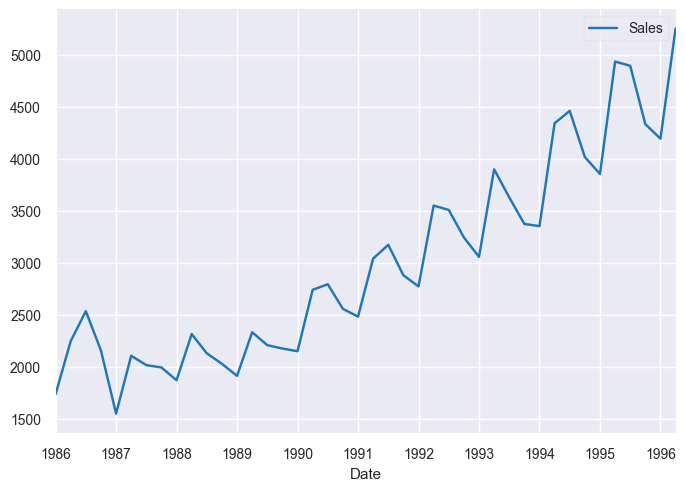

In [94]:
interpolated_month.plot()
plt.show()

In [107]:
df2=interpolated_month.copy()
df2.reset_index(inplace=True)
df2['date']=pd.to_datetime(df2['Date'])
df2['year']=df2['Date'].dt.year
df2['month']=df2['Date'].dt.month

df2['week'] =df2['Date'].dt.isocalendar().week
df2['quarter'] = df2['Date'].dt.quarter
df2['day_of_week'] = df2['Date'].dt.day_name()
#df2.drop('Date', axis =1 , inplace= True)
df2.head()



Date        Sales       date  year  month  week  quarter day_of_week
0 1986-01-31  1734.827000 1986-01-31  1986      1     5        1      Friday
1 1986-02-28  1904.871666 1986-02-28  1986      2     9        1      Friday
2 1986-03-31  2074.916332 1986-03-31  1986      3    14        1      Monday
3 1986-04-30  2244.960999 1986-04-30  1986      4    18        2   Wednesday
4 1986-05-31  2341.242330 1986-05-31  1986      5    22        2    Saturday

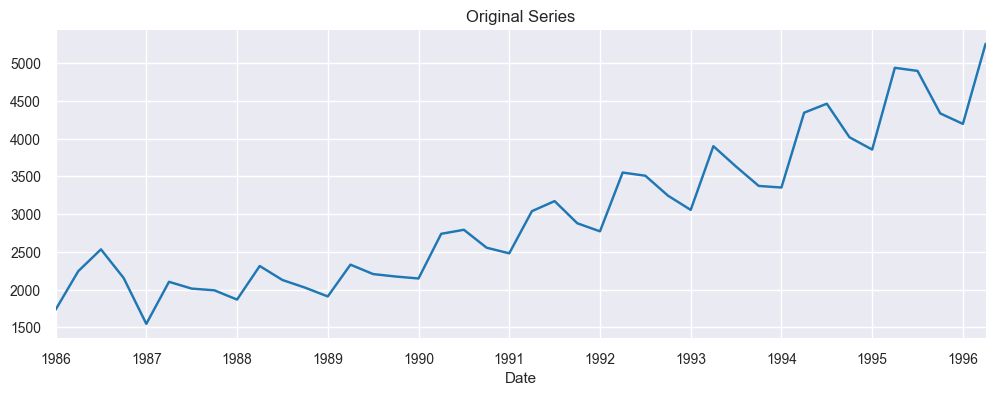

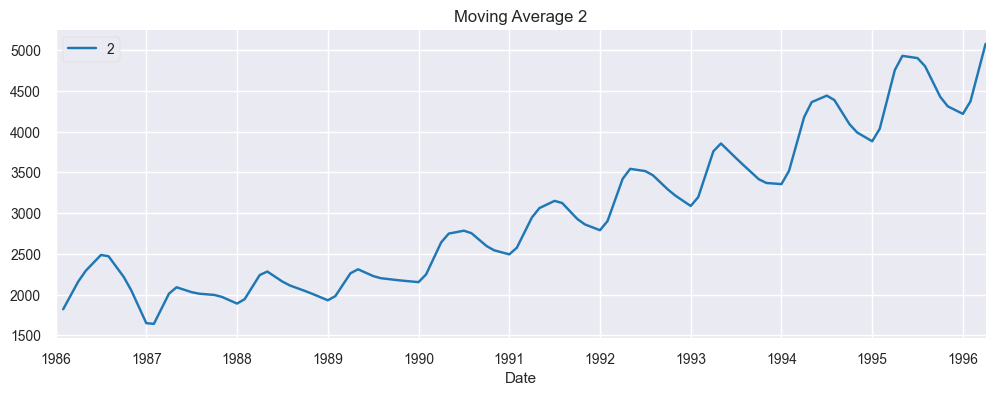

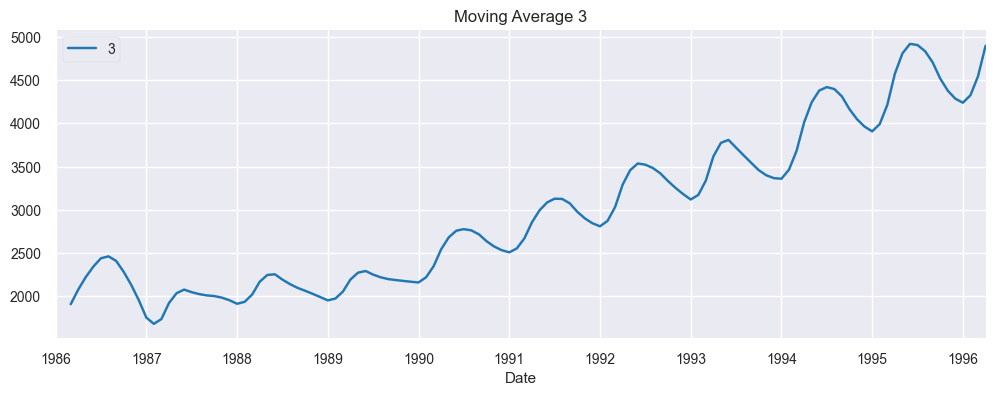

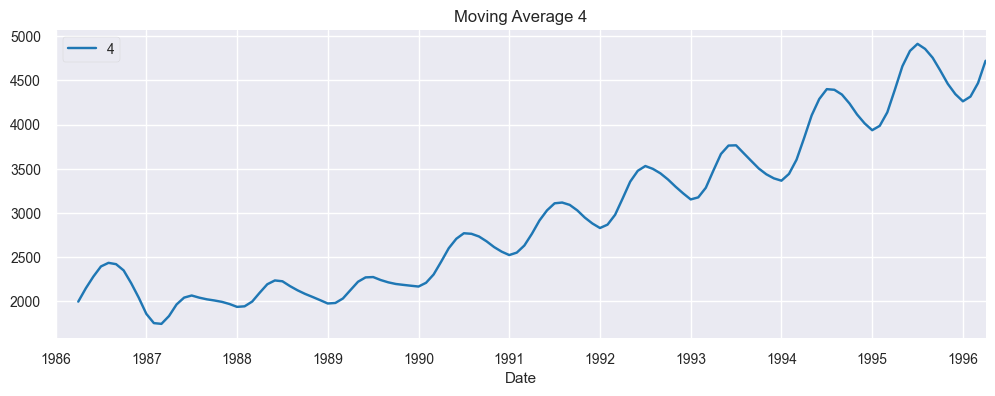

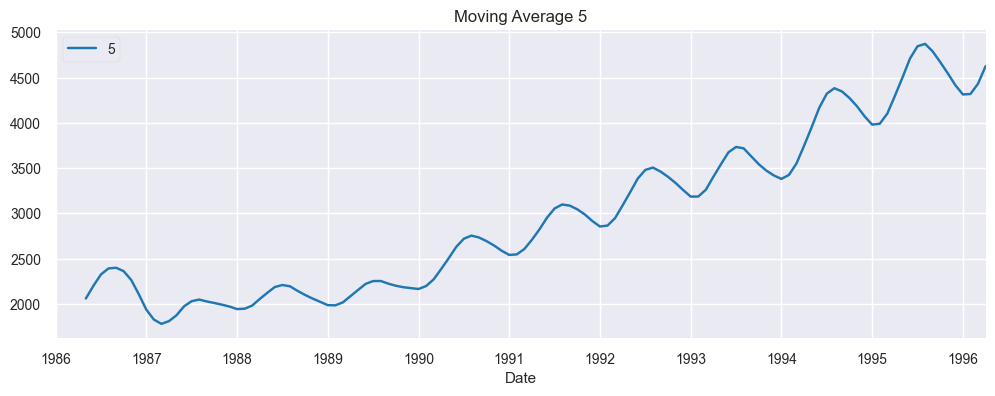

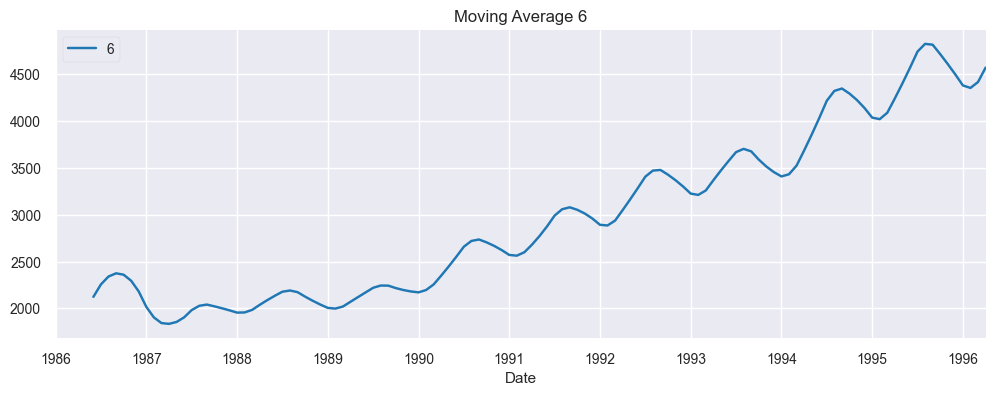

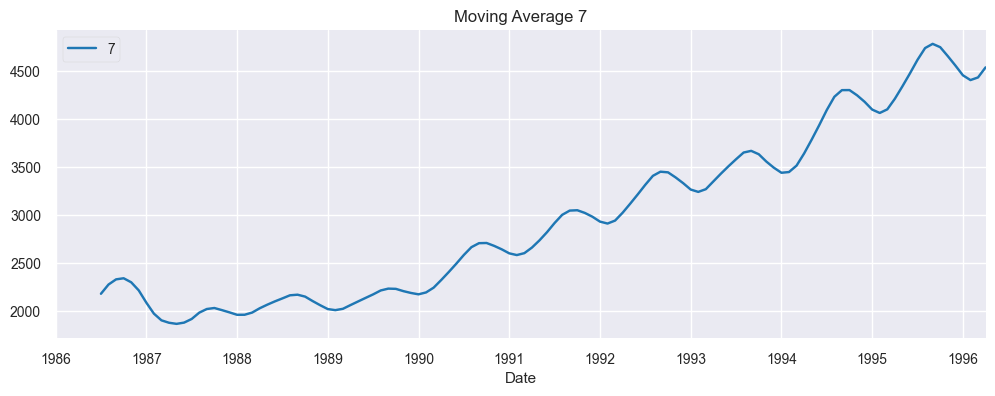

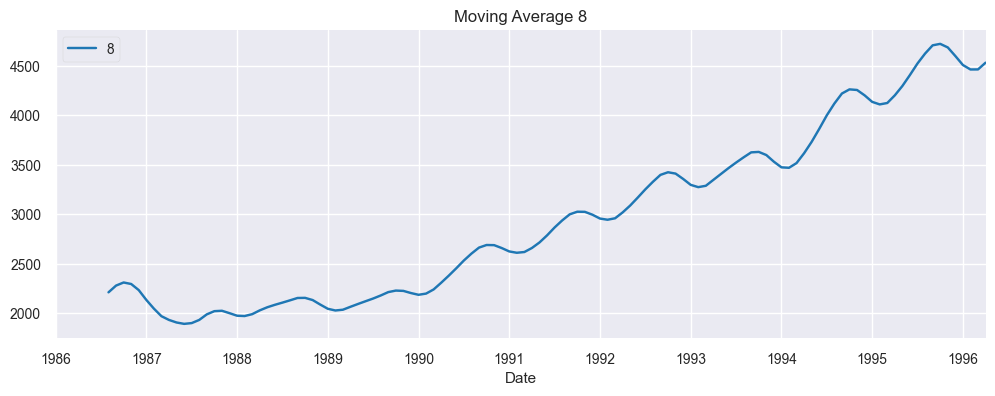

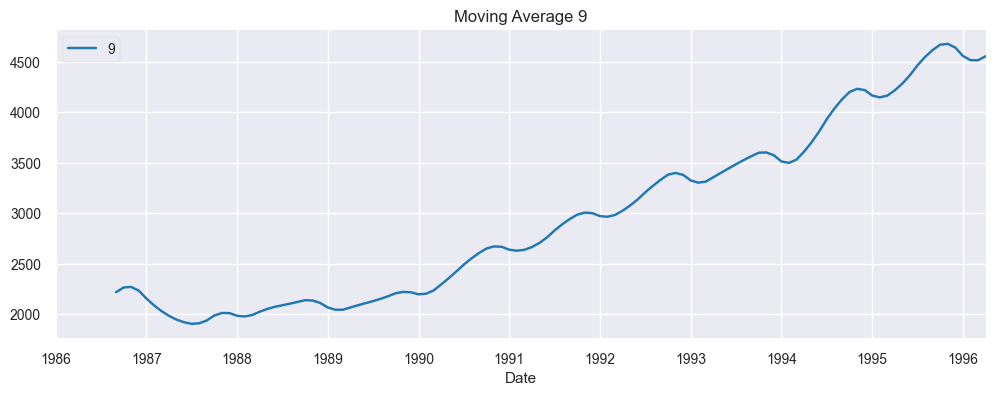

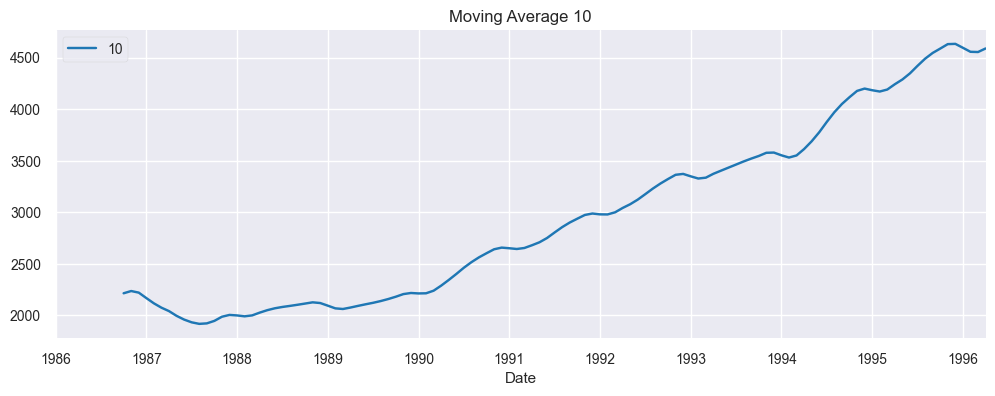

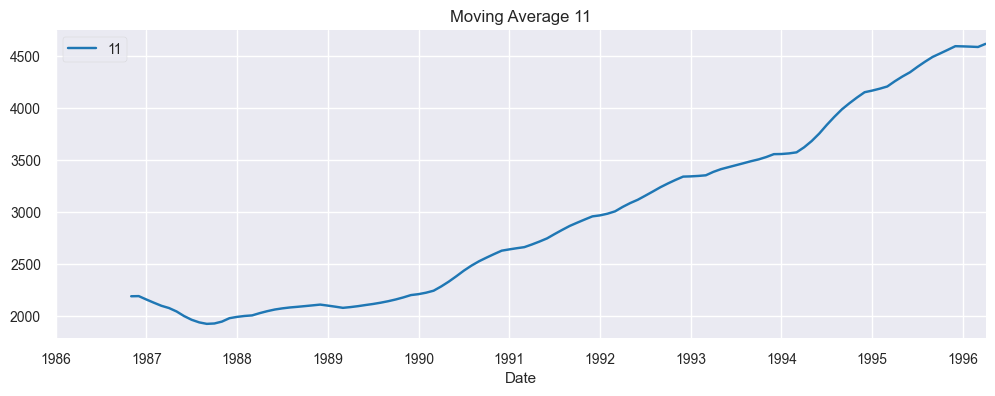

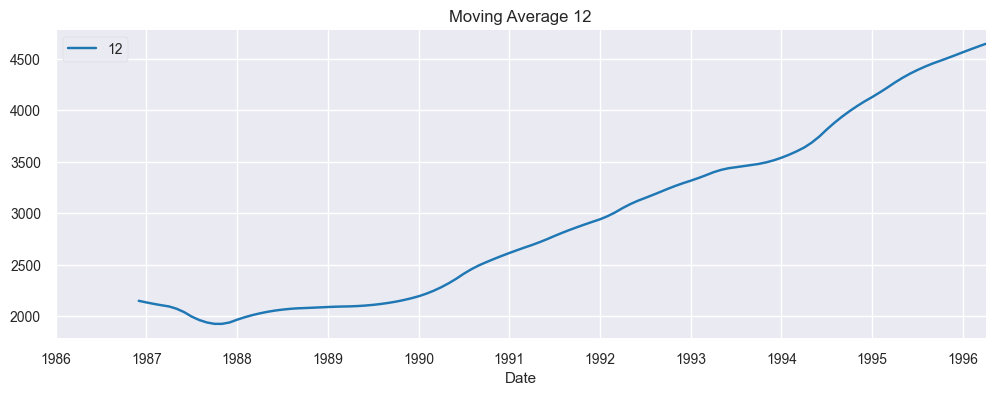

In [112]:
plt.figure(figsize=(12,4))
interpolated_month['Sales'].plot()
plt.title('Original Series')

for i in [2,3,4,5,6,7,8,9,10,11,12]:
    plt.figure(figsize=(12,4))
    interpolated_month['Sales'].rolling(i).mean().plot(label=str(i))
    plt.title('Moving Average ' +str(i))
    plt.legend(loc='best')
    plt.show()

We see the comaprison btween original and rolling 12 mean

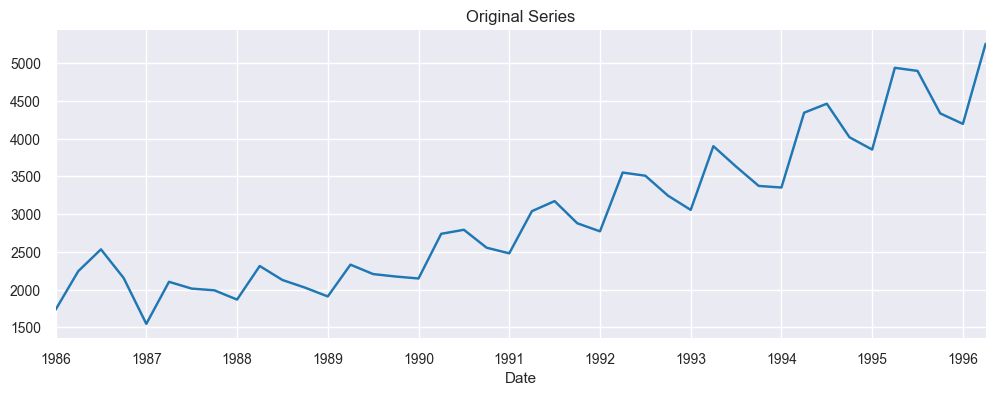

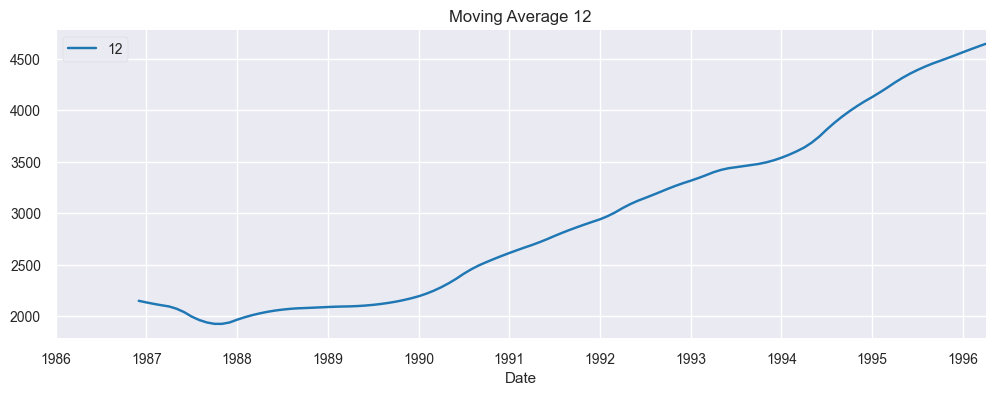

In [113]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
interpolated_month["Sales"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

# Time Series Decomposition
## Additive Seasonal Decomposition

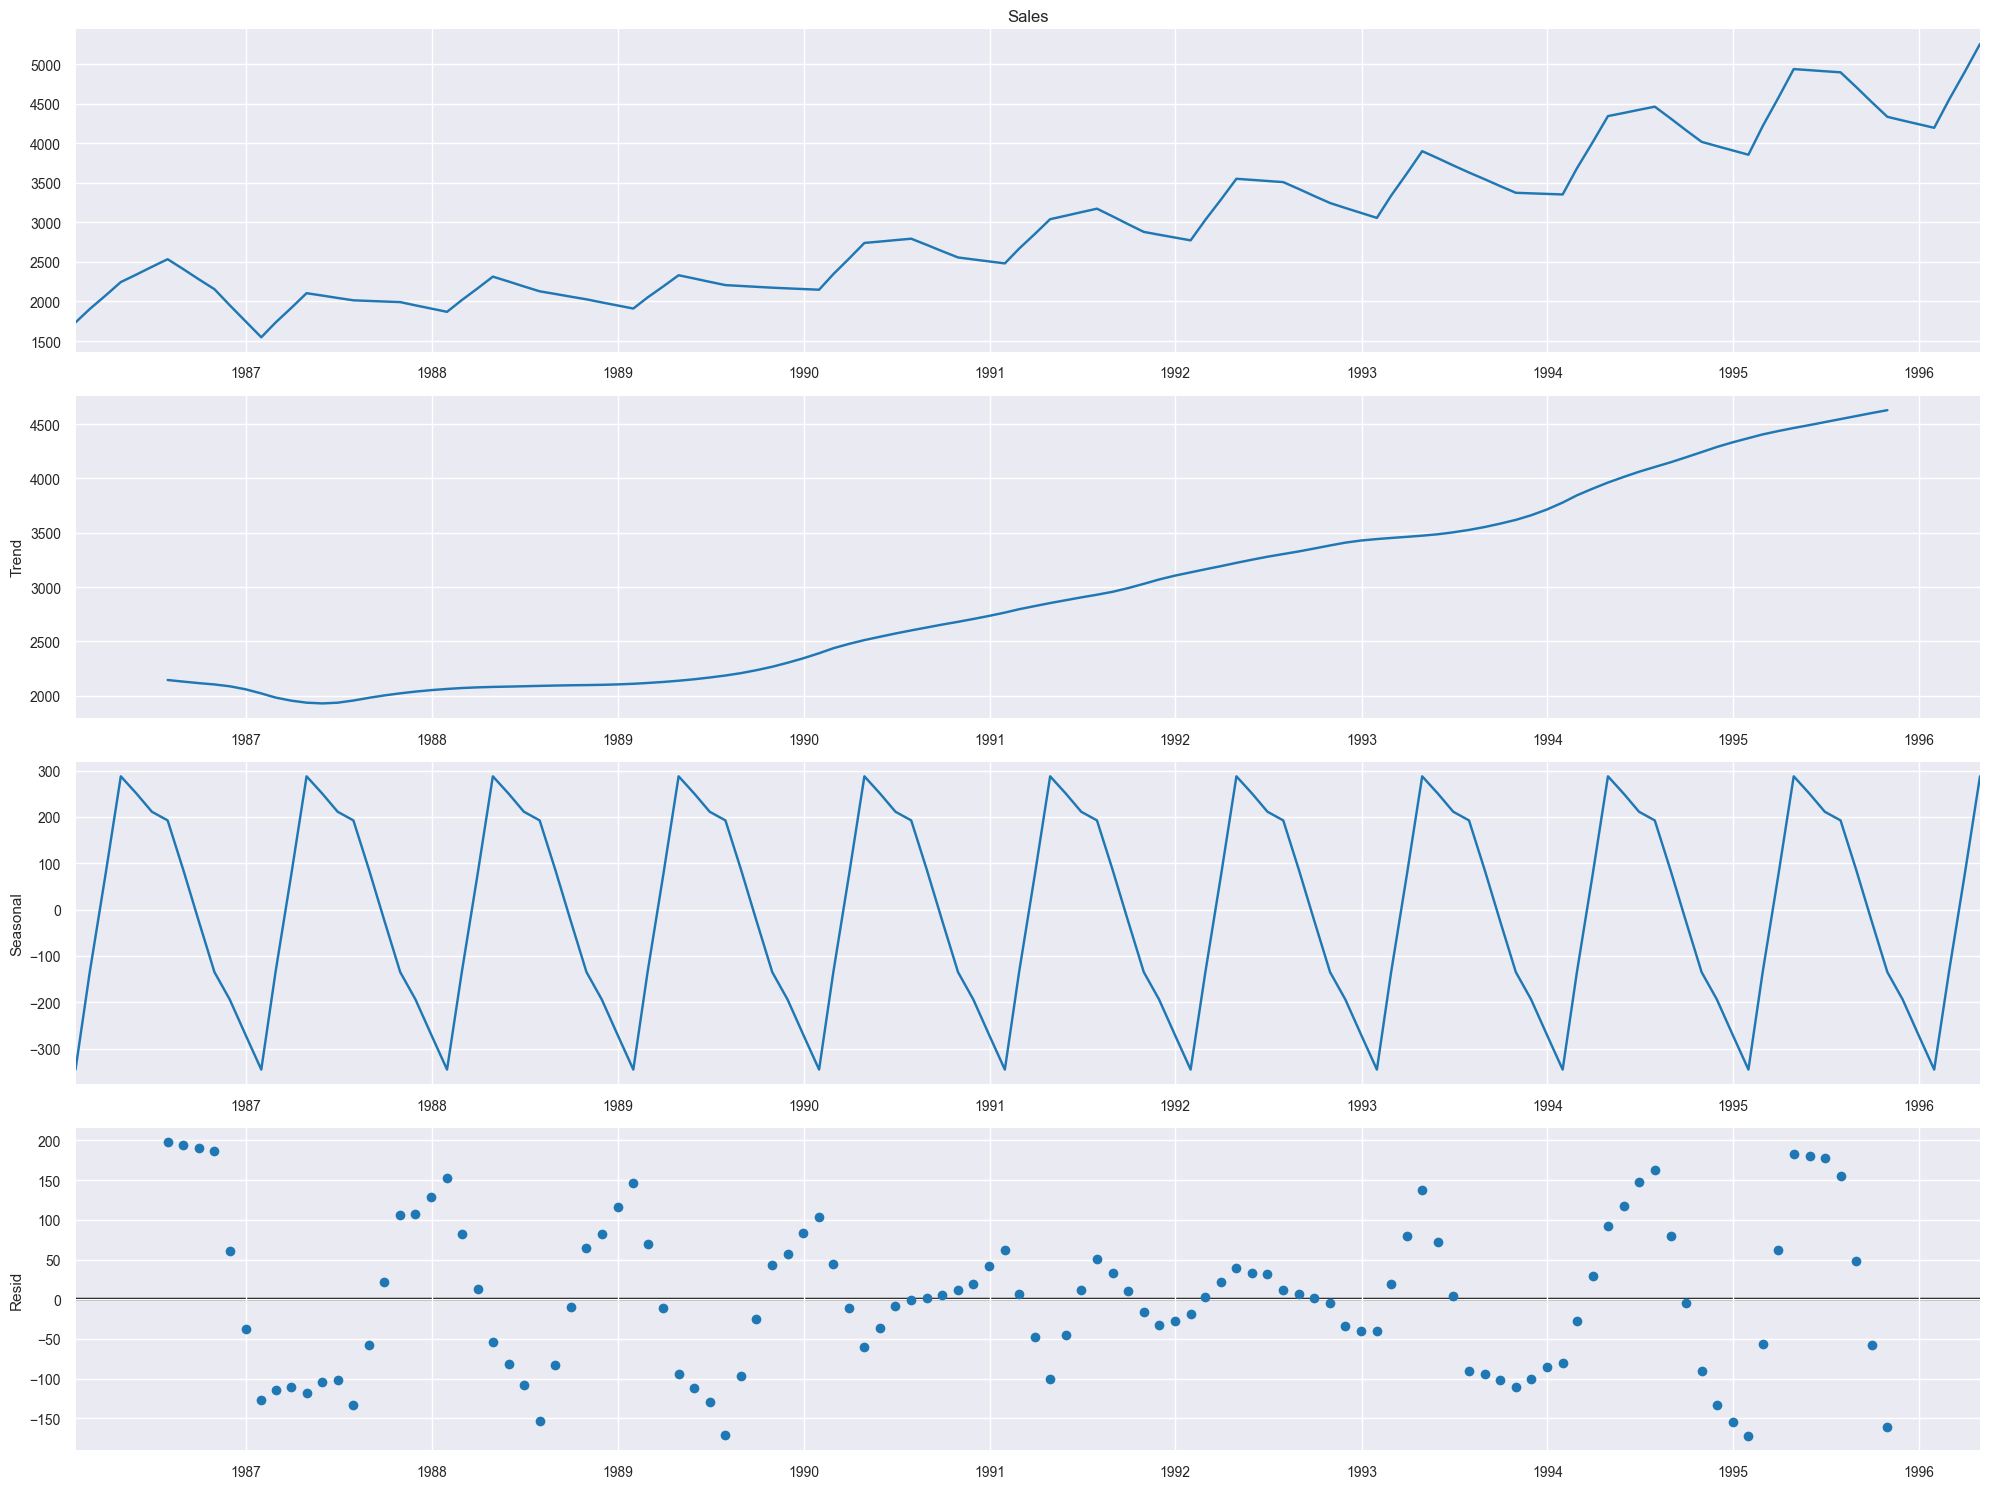

In [116]:
decompose_ts_add = seasonal_decompose(interpolated_month['Sales'],period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(20,15))
    decompose_ts_add.plot()
    plt.show()

### Multiplicative Seasonal Decomposition


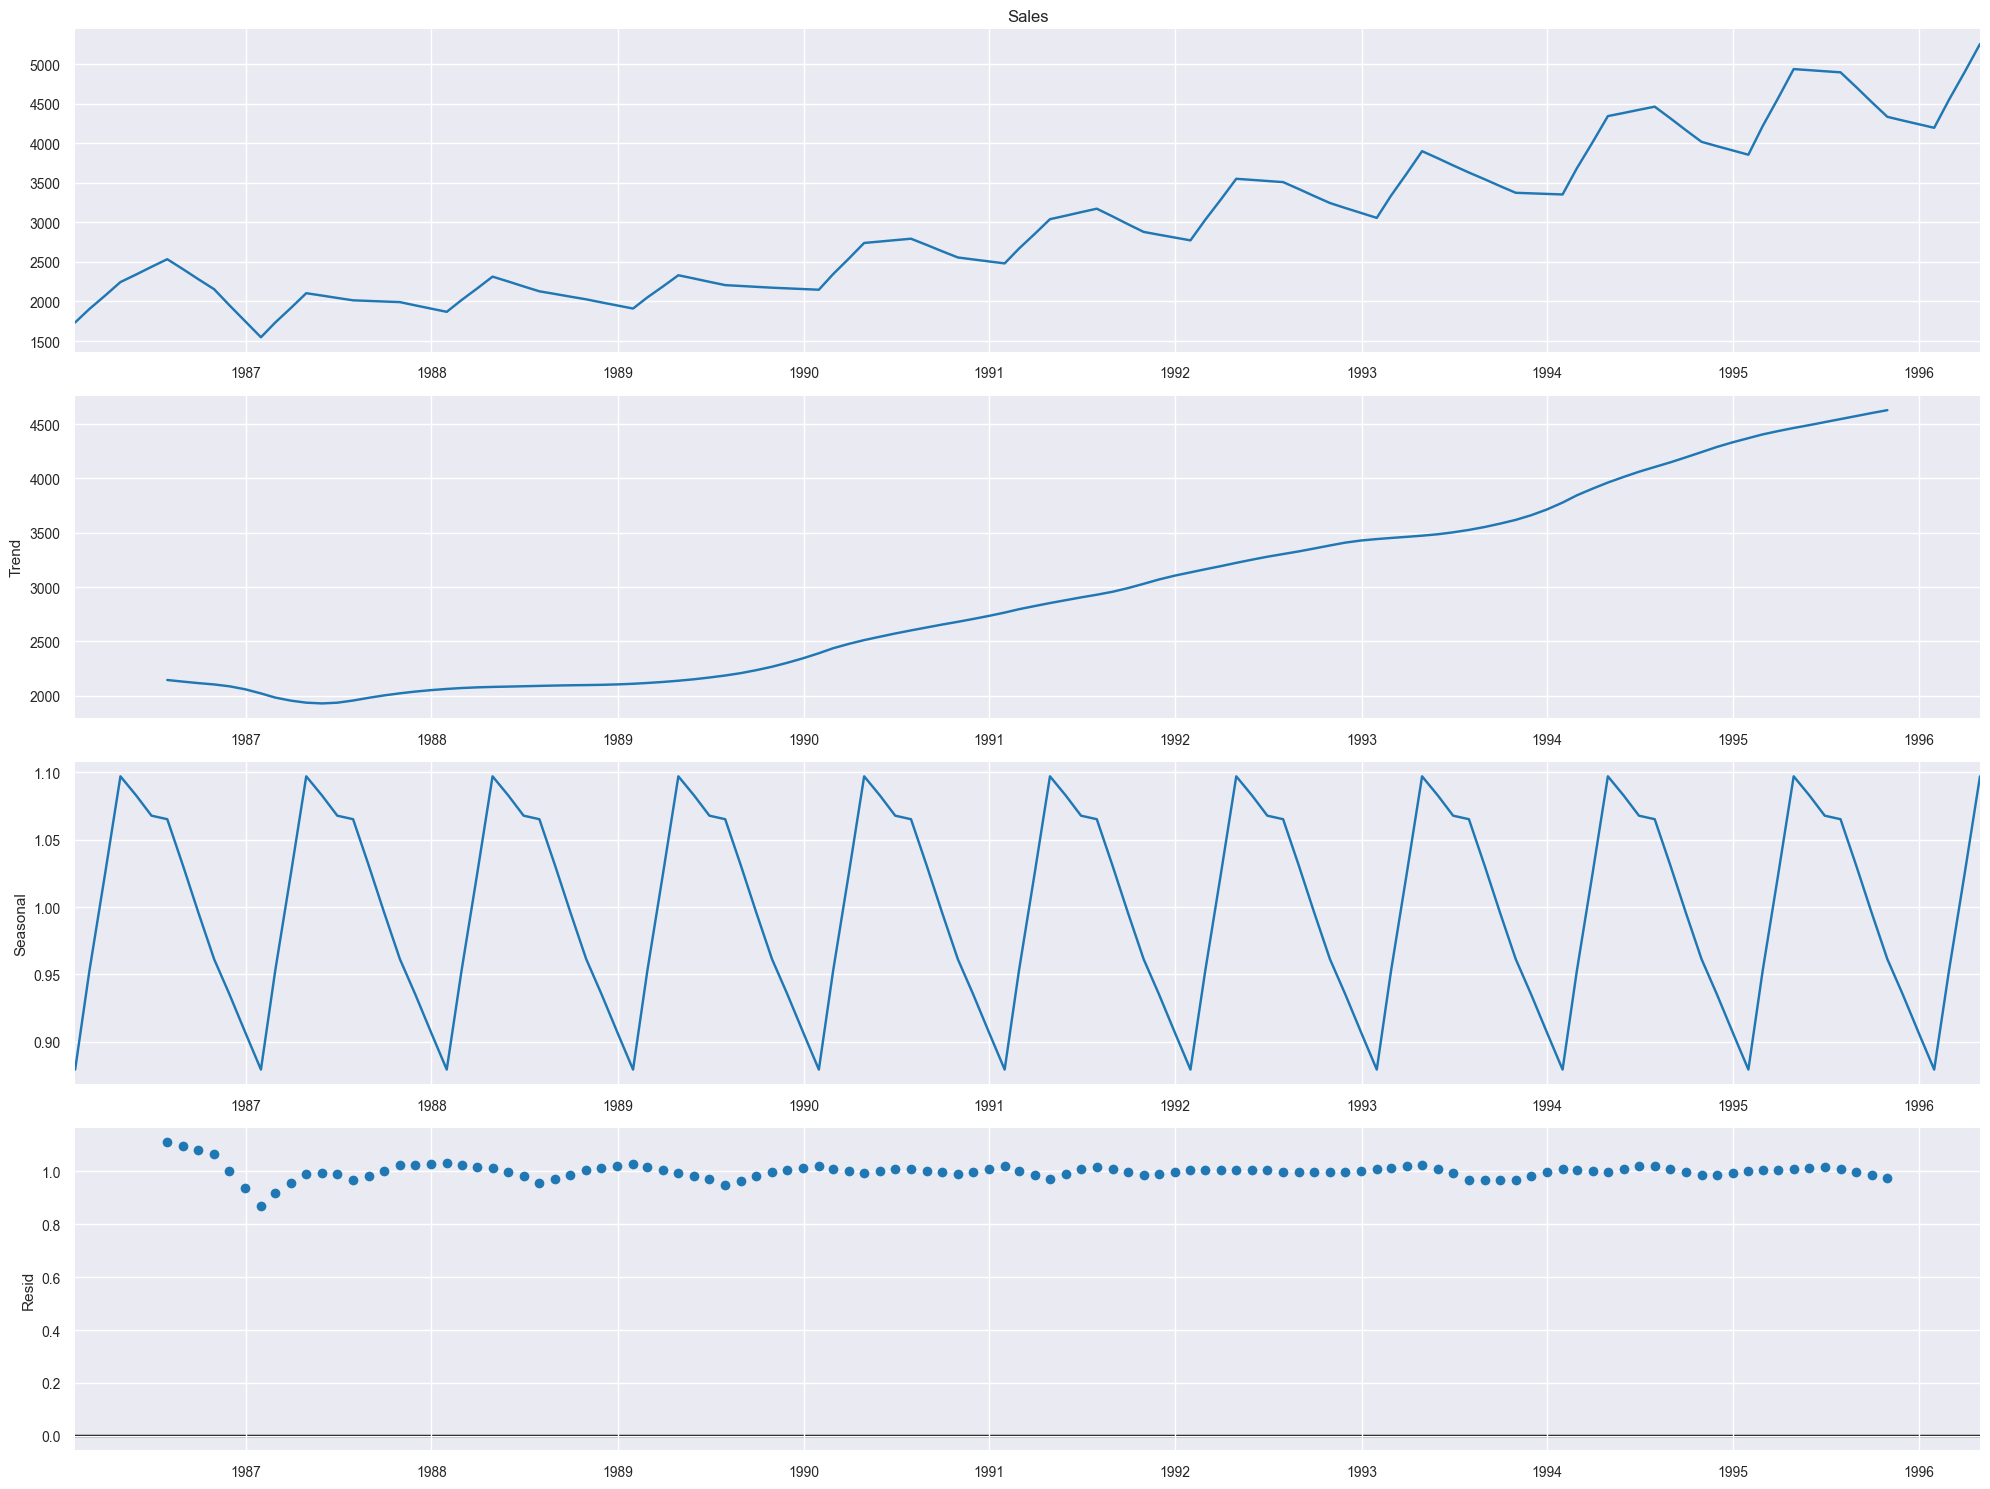

In [118]:
decompose_ts_mul = seasonal_decompose(interpolated_month.Sales,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(20,15))
    decompose_ts_mul.plot()
    plt.show()

### Splitting Train and Test Data
#### Leaving Test Data with 2 Years of Time Series


In [119]:
train_df= interpolated_month[:100]
test_df = interpolated_month[100:]


In [120]:
train_df

Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
...                 ...
1993-12-31  3359.000000
1994-01-31  3352.000000
1994-02-28  3682.000000
1994-03-31  4012.000000
1994-04-30  4342.000000

[100 rows x 1 columns]

In [121]:
test_df

Sales
Date                   
1994-05-31  4381.666667
1994-06-30  4421.333333
1994-07-31  4461.000000
1994-08-31  4313.000000
1994-09-30  4165.000000
1994-10-31  4017.000000
1994-11-30  3962.666667
1994-12-31  3908.333333
1995-01-31  3854.000000
1995-02-28  4214.666667
1995-03-31  4575.333333
1995-04-30  4936.000000
1995-05-31  4922.333333
1995-06-30  4908.666667
1995-07-31  4895.000000
1995-08-31  4707.666667
1995-09-30  4520.333333
1995-10-31  4333.000000
1995-11-30  4286.666667
1995-12-31  4240.333333
1996-01-31  4194.000000
1996-02-29  4547.000000
1996-03-31  4900.000000
1996-04-30  5253.000000

In [123]:
print('Train:',train_df.index.min(),train_df.index.max(),'\n',
'Test:',test_df.index.min(),test_df.index.max())


Train: 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test: 1994-05-31 00:00:00 1996-04-30 00:00:00


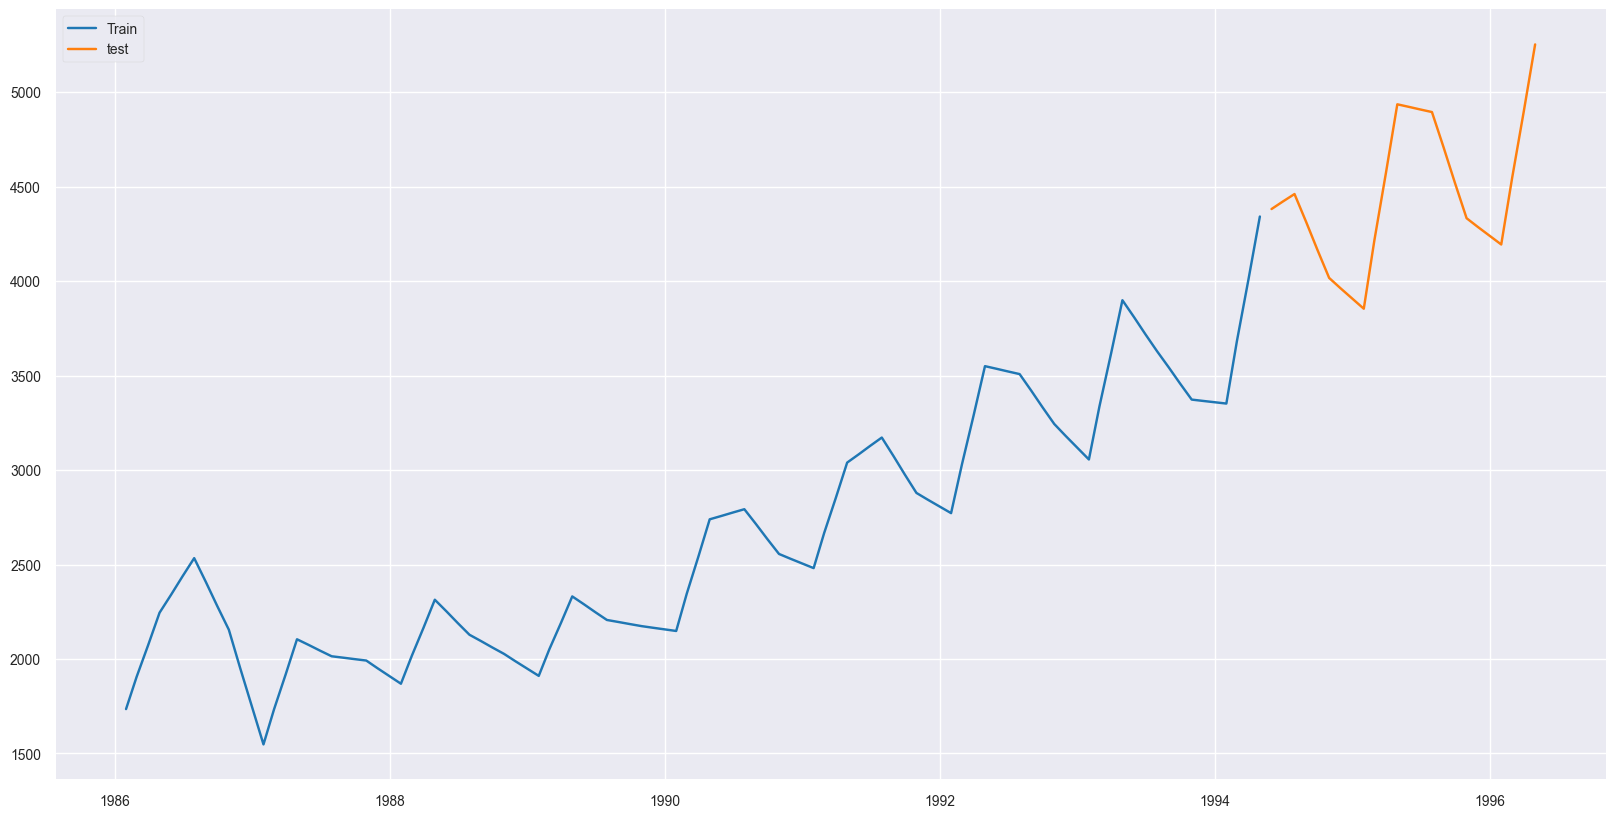

In [133]:
plt.figure(figsize=(20,10))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.legend(loc='best')

In [134]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


# Exponential Methods
## Simple Exponential Method
### Using Forecast Attribute

In [136]:
from math import sqrt
ses_model = SimpleExpSmoothing(train_df['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_df.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_df))
mape_ses = MAPE(test_pred_ses,test_df.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 6.619719427225402 
 Train Root Mean Squared Error = 129.37951453141417 
 Test Root Mean Squared Error = 381.95422355078995


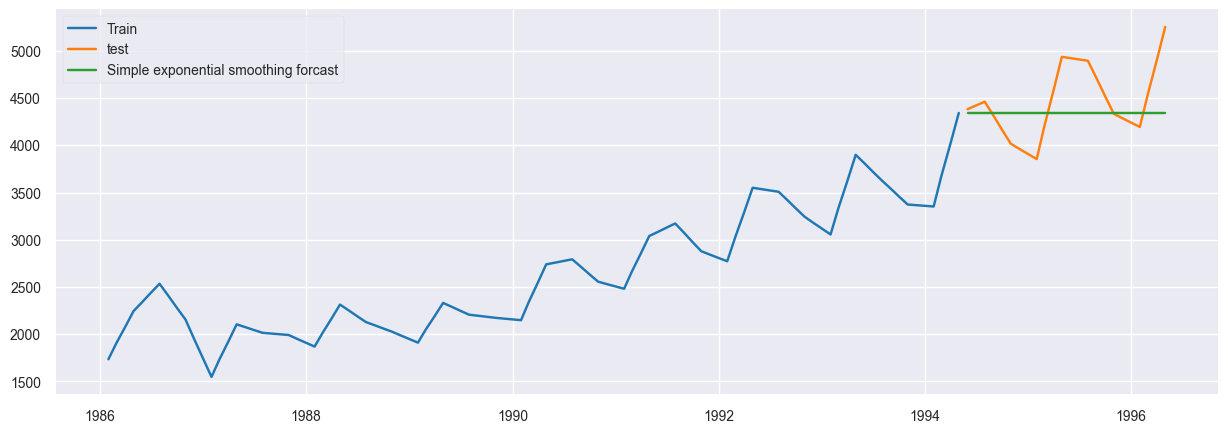

In [139]:
plt.figure(figsize=(15,5))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

- No seasonality Captures
- Recent observation gets higher weightage than the older oner for forecasting.

### Holt method (Double Exponential)
**Captures both Level and Trend**

In [141]:
dexp_model  = Holt(train_df).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_df.Sales))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_df))
mape_dexp = MAPE(test_pred_dexp,test_df.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 89.7001615463704 
 Train Root Mean Squared Error = 108.58347720512378 
 Test Root Mean Squared Error = 4560.457728458048


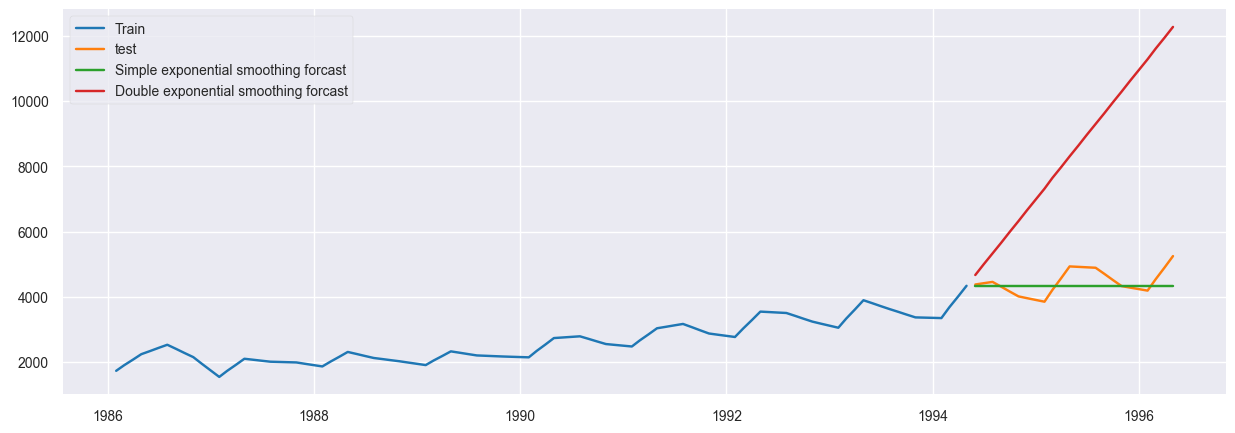

In [143]:
plt.figure(figsize=(15,5))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

- We can see that we are able to capture the trend of the data but the level is on another level.
- Its too far from simple exponential forecasting
- We were not able to capture the seasonality.

## Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
**Captures Level, Trend and Seasonality.**

In [145]:
texp_add_model  = ExponentialSmoothing(train_df,seasonal="add",
                                       trend="add",
                                       seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_df.Sales))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_df))
mape_ad_texp = MAPE(test_pred_ad_texp,test_df.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_texp))


Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 34.23944156457067 
 Train Root Mean Squared Error = 44.17572264662261 
 Test Root Mean Squared Error = 1758.7055544098644


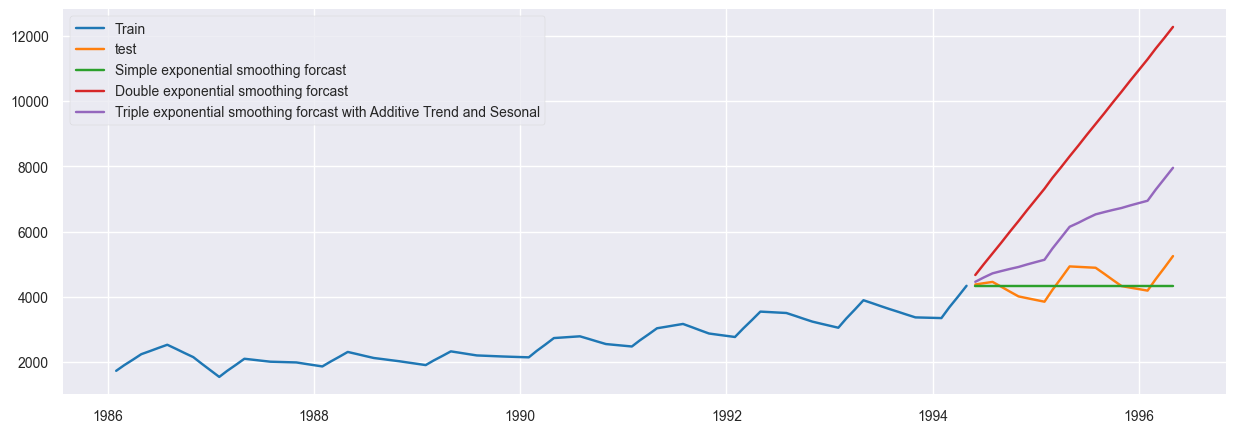

In [148]:
plt.figure(figsize=(15,5))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

- It captures the trend, which we can see that the forecasted values are higher level than the test level.
- The peak of the forecasted value is higher than the actual.

## Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [149]:
texp_mul_ad_model  = ExponentialSmoothing(train_df,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_df.Sales))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_df))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_df.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))


Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 1.483298493452904 
 Train Root Mean Squared Error = 50.22454696270186 
 Test Root Mean Squared Error = 78.3845682517769


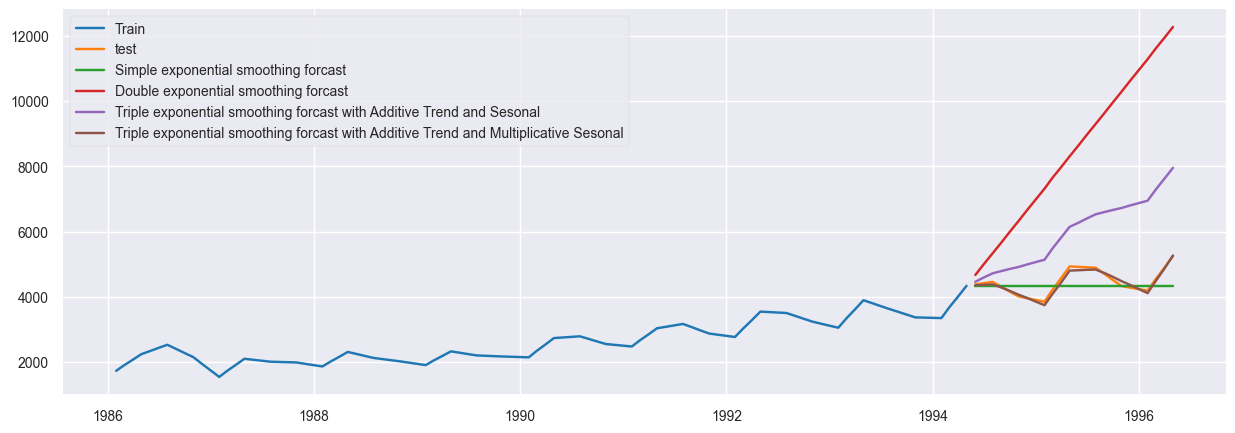

In [151]:
plt.figure(figsize=(15,5))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()


- We can see that the errors have reduced drastically.
- Its almost same.

## Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [152]:
texp_ad_mul_model  = ExponentialSmoothing(train_df,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_df.Sales))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_df))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_df.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))


Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 5.157134449259166 
 Train Root Mean Squared Error = 166.60624759961158 
 Test Root Mean Squared Error = 269.5054193081448


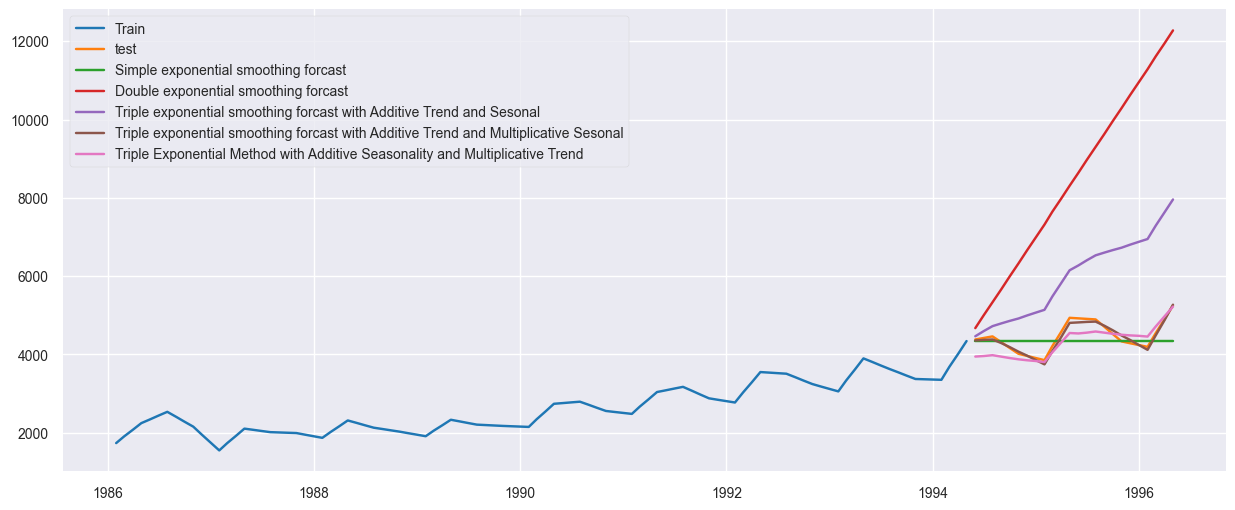

In [154]:
plt.figure(figsize=(15,6))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

- we can see that the last 3 trends are overlapping with test data.

## Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [155]:
texp_mul_model  = ExponentialSmoothing(train_df,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_df.Sales))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_df))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_df.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))


Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 2.6327808147458014 
 Train Root Mean Squared Error = 42.561957415060434 
 Test Root Mean Squared Error = 168.8434861791096


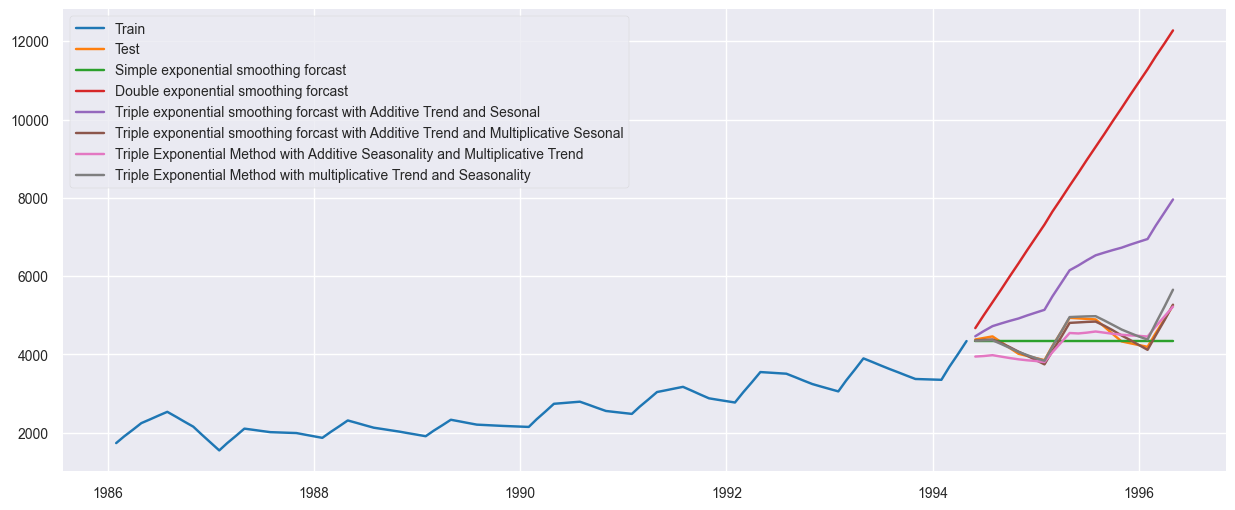

In [156]:
plt.figure(figsize=(15,6))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()


# Comparing the results 


In [157]:

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_mul_ad   50.224547      1.483298         78.384568
1     Triple_Exp_mul   42.561957      2.632781        168.843486
2  Triple_Exp_ad_mul  166.606248      5.157134        269.505419
3         Simple_Exp  129.379515      6.619719        381.954224
4      Triple_Exp_ad   44.175723     34.239442       1758.705554
5         Double_Exp  108.583477     89.700162       4560.457728

# Visualizing Models Performance

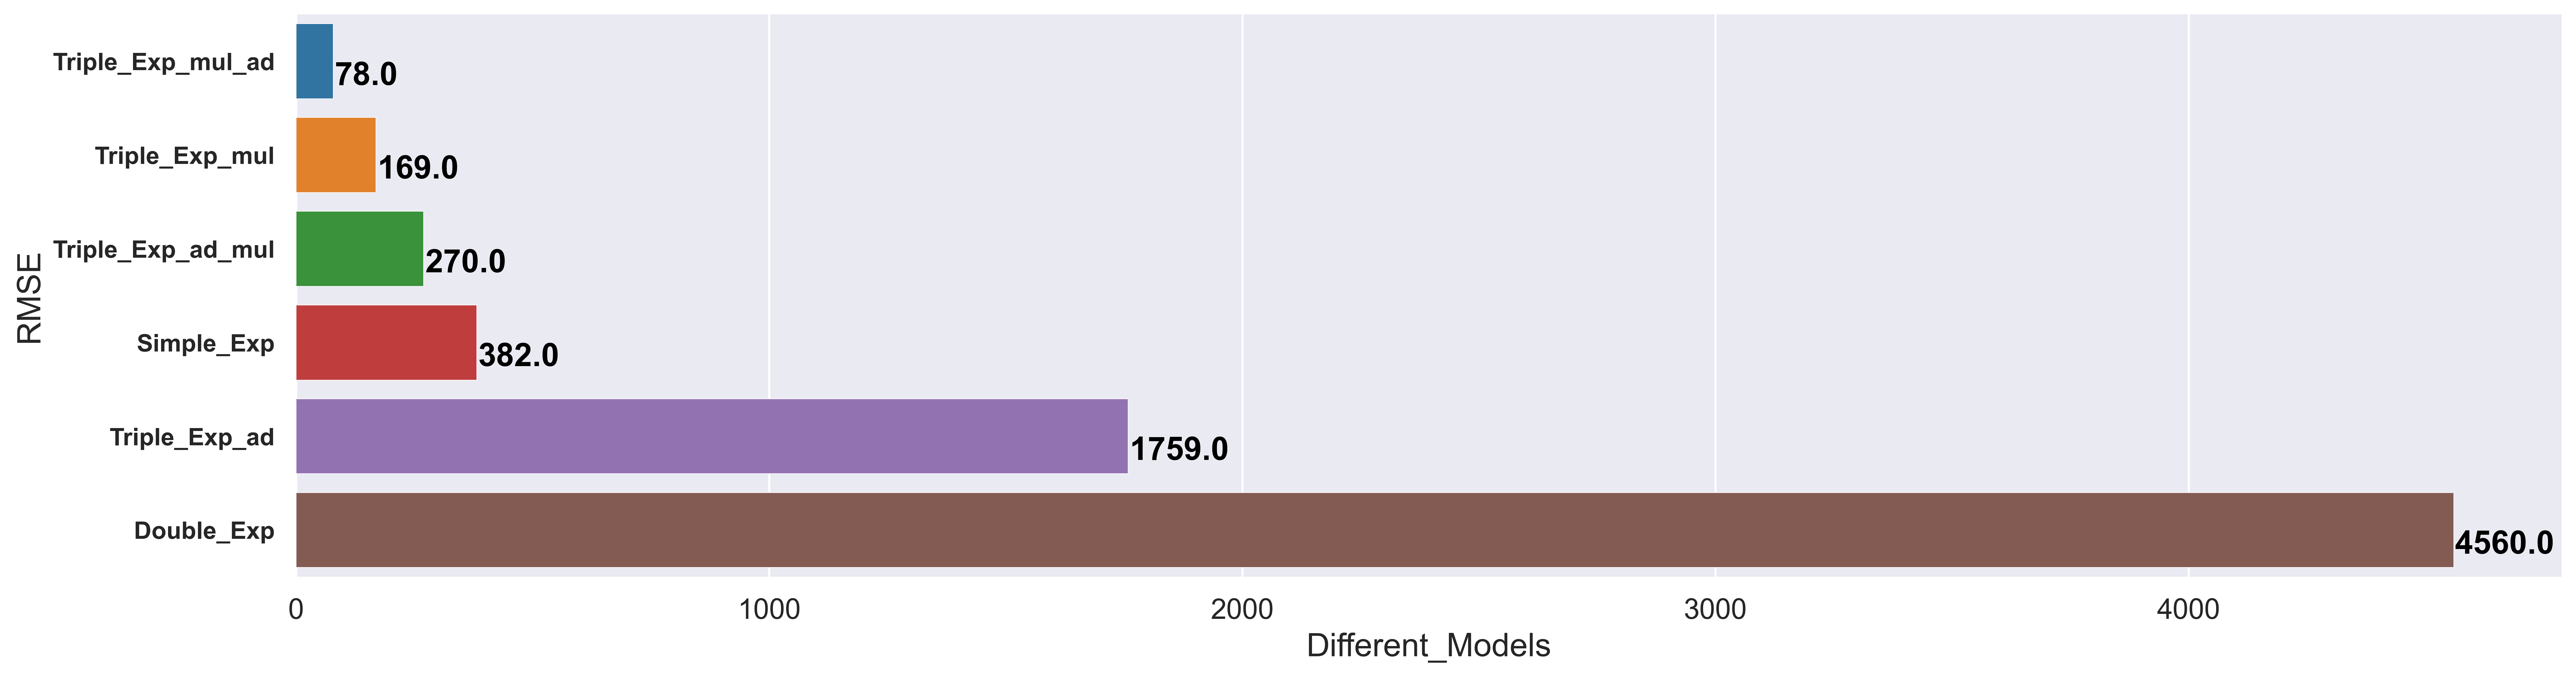

In [162]:
f, axe = plt.subplots(1,1, figsize=(20,5), dpi=500)
sn.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

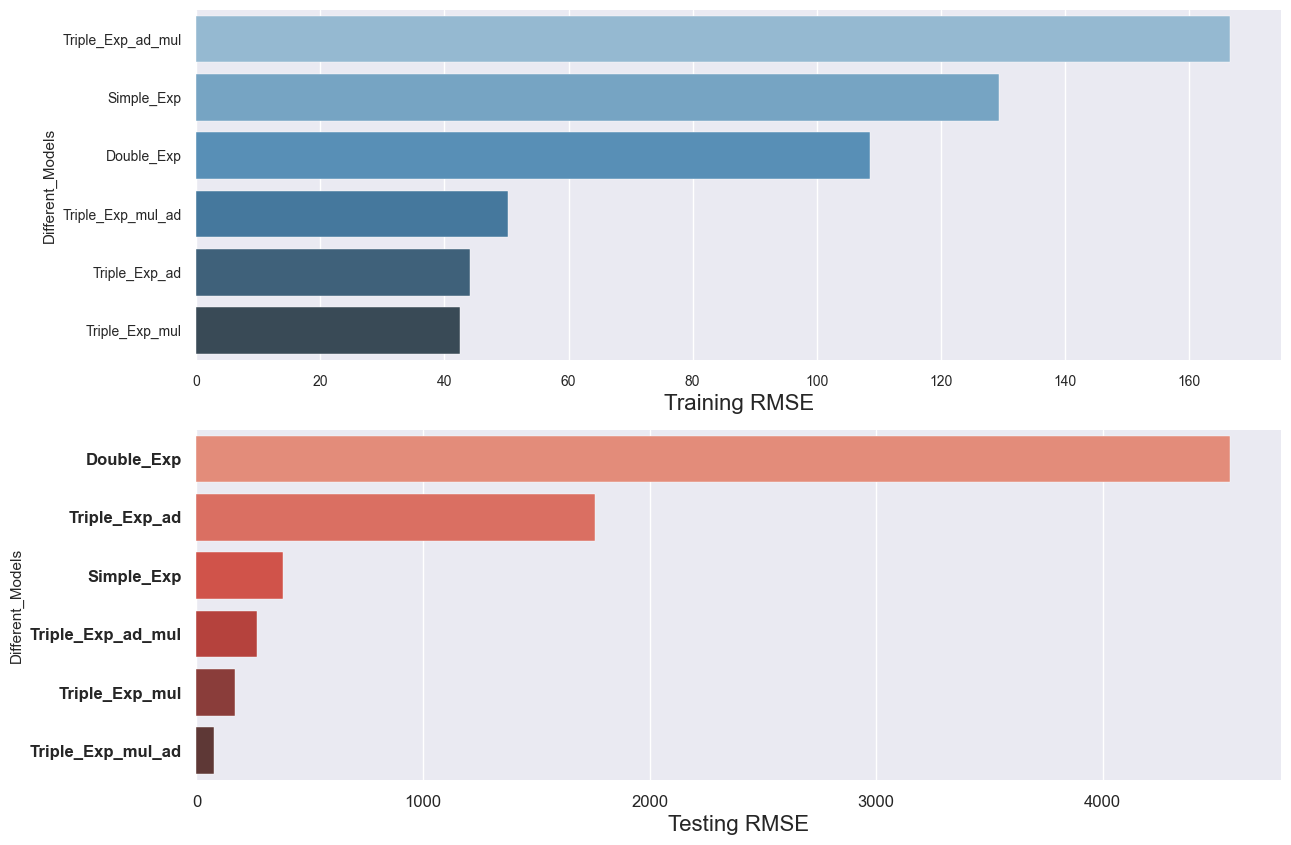

In [177]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=12)
train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sn.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models')

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sn.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models')

plt.show()

# Autoregressive Integrated Moving Averages (ARIMA)

### Test of Stationarity
#### As we have quarterly data the window size for moving average is equal to 4.


In [179]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

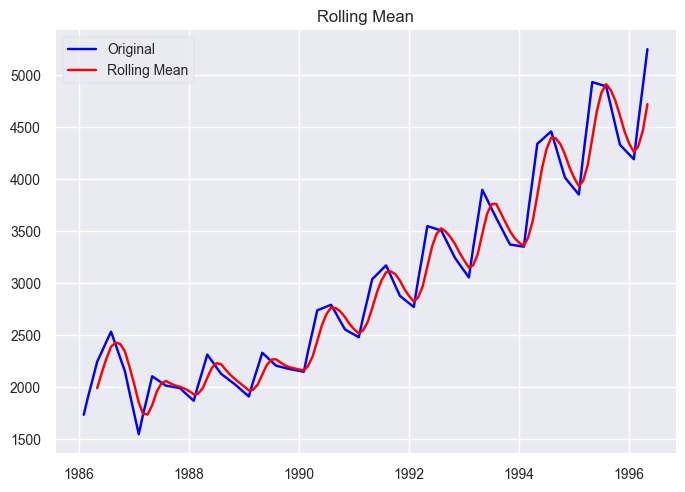

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [180]:
sales= pd.DataFrame()
sales['Sales'] = interpolated_month[['Sales']]
test_stationarity(sales)

### Augmented Dicky Fuller Test


In [181]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [182]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


## Feature Scaling (Transformations)
### Square Root Transform

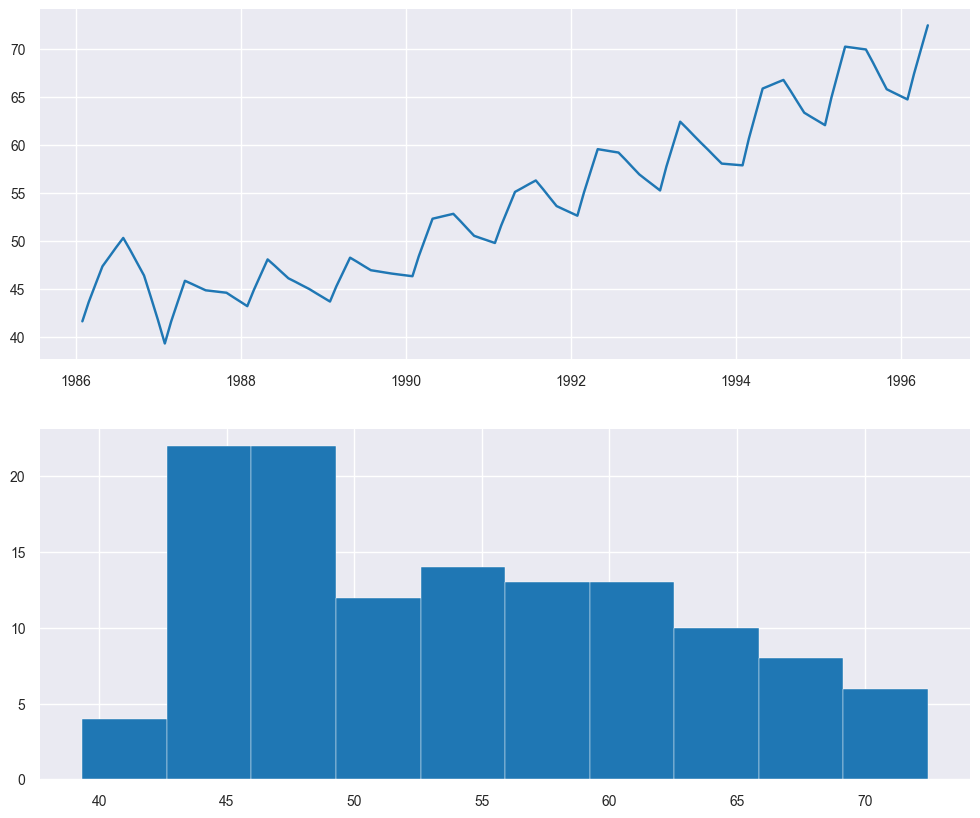

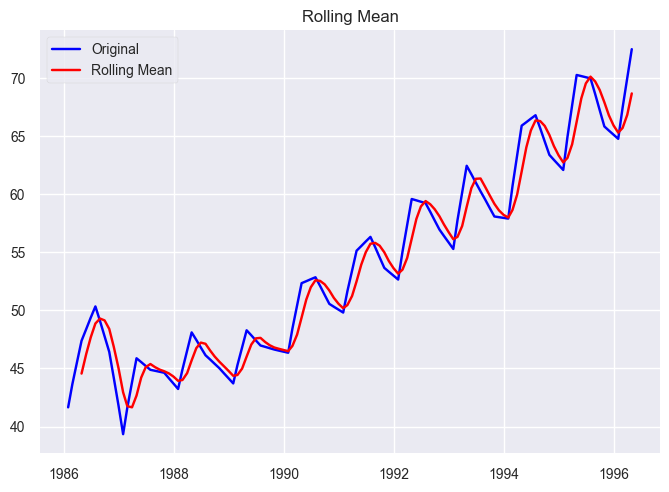

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [184]:
square_root= pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

test_stationarity(square_root)

In [185]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


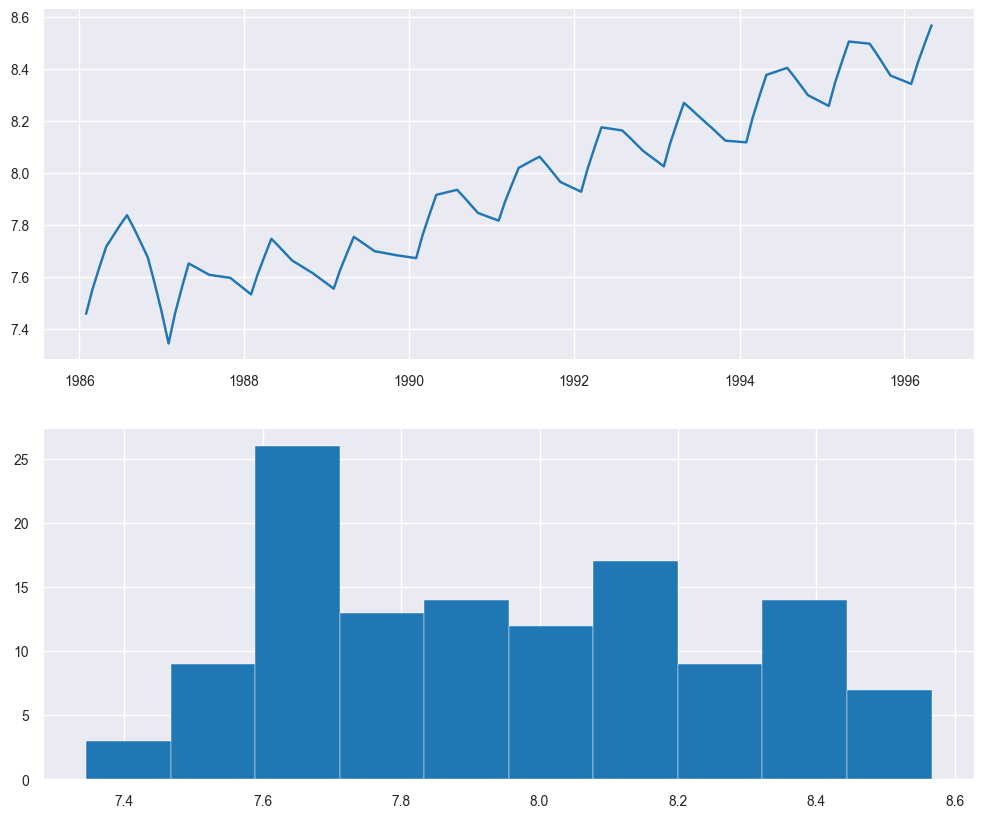

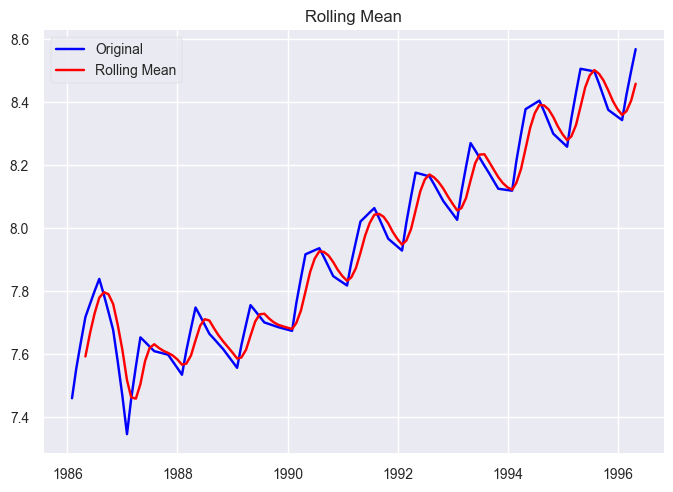

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [186]:
# Log Transform
log = pd.DataFrame()
log = interpolated_month[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])
#Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

test_stationarity(log)

In [187]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


## Box Cox Transformation


Sales
Date                
1986-01-31  7.458663
1986-02-28  7.552170
1986-03-31  7.637676
1986-04-30  7.716443
1986-05-31  7.758437

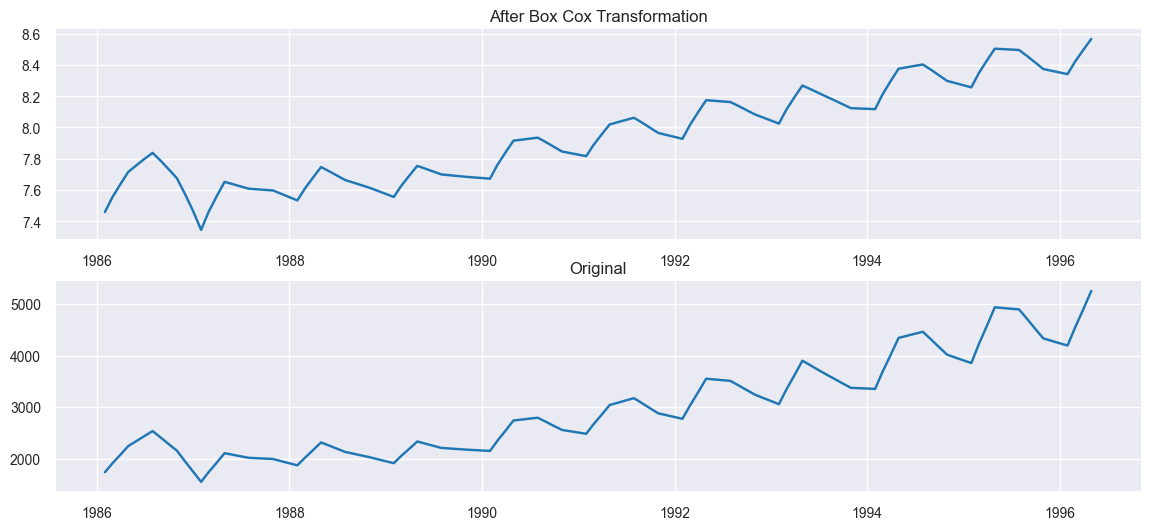

In [188]:
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

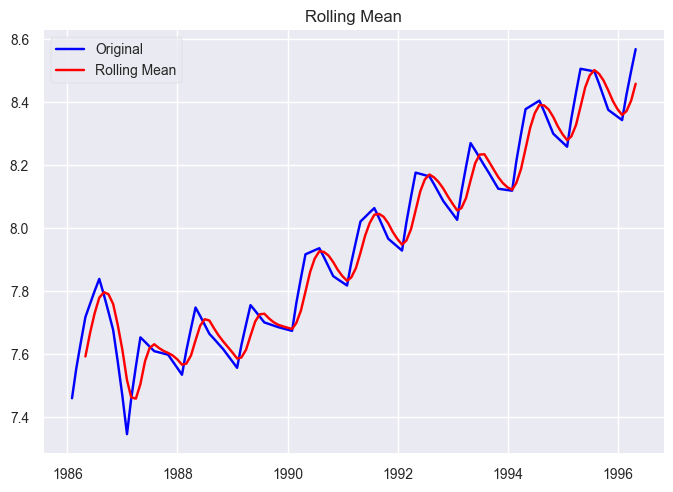

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [189]:
test_stationarity(data_boxcox)

In [190]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


## Differencing of the Box-Cox Transformation

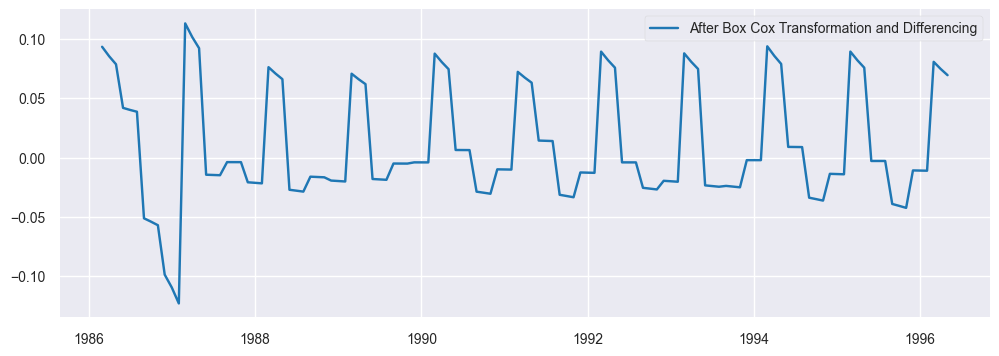

In [191]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

- We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
- It is a horizontal trend.
- The mean became constant. The mean is zero.
- Also, the variance is almost constant.

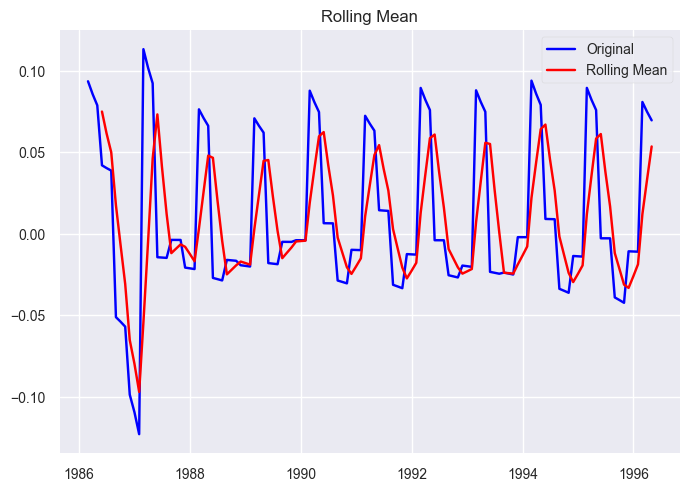

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [192]:
test_stationarity(data_boxcox_diff)

In [193]:
adf_test(data_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


- Finally, Our Series is now stationary for AR Forecasting


In [201]:
from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA

In [197]:
data_boxcox_diff.head()

Sales
Date                
1986-02-28  0.093507
1986-03-31  0.085506
1986-04-30  0.078767
1986-05-31  0.041994
1986-06-30  0.040301

## Building The Time Series Forecasting with Optimal Value using ARIMA

In [243]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [244]:
model = ARIMA(train_data_boxcox_diff, order=(3,0,2))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].cumsum()
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast'].add(data_boxcox.Sales[0])
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast'])


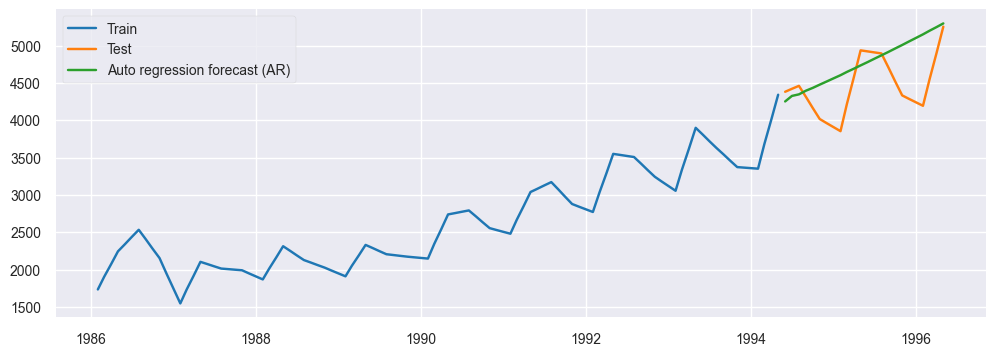

In [245]:
plt.figure(figsize=(12,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df, label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_df.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [210]:
# RMSE (Root Mean Squared Error)
rmse_ARIMA = np.sqrt(mean_squared_error(test_df, y_hat_ar['ar_forecast'][test_df.index.min():])).round(2)
rmse_ARIMA

473.6

In [214]:
#MAPE (Mean Absolute Percent Error)
mape_arima = MAPE(y_hat_ar['ar_forecast'],test_df.Sales)
mape_arima

8.86330495920406

In [215]:
model_residual = model_fit.resid
model_residual.mean()

0.00018295402881212376

In [216]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


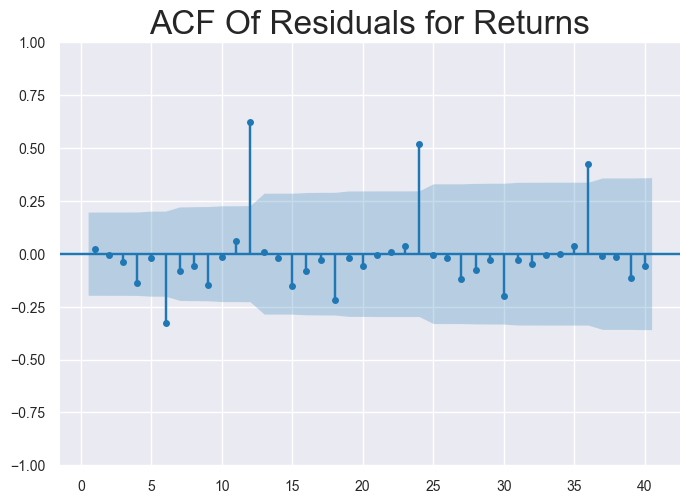

In [217]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

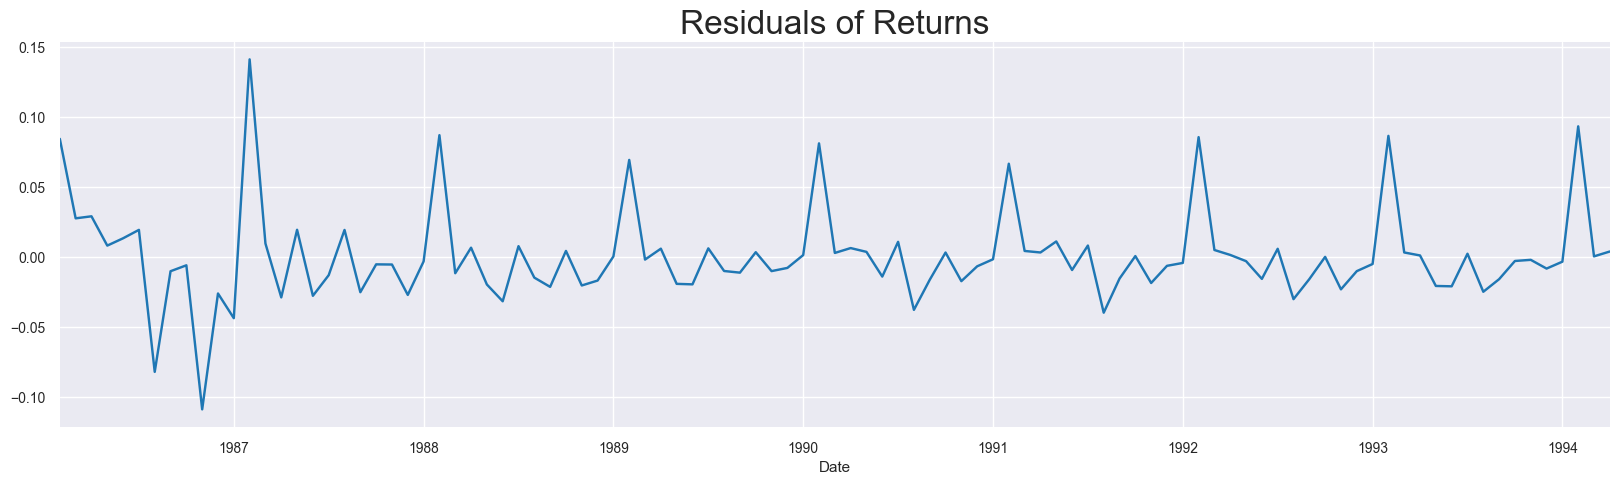

In [218]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

## Seasonal Auto Regressive Integrated Moving Averge(SARIMA)

In [230]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [231]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])


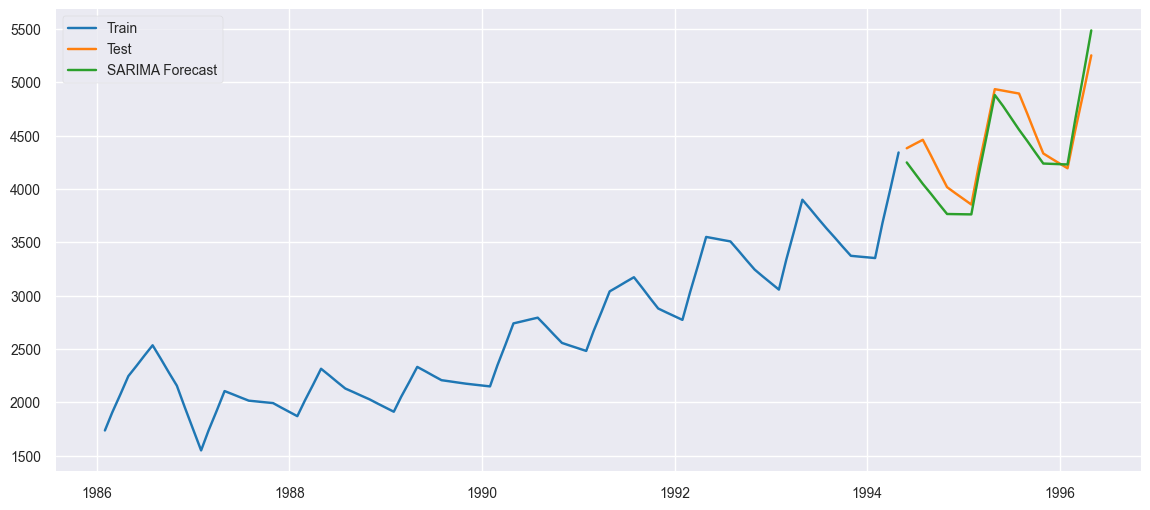

In [232]:
plt.figure(figsize=(14,6))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_df.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [233]:
# RMSE (Root Mean Squared Error)
rmse_SARIMA = np.sqrt(mean_squared_error(test_df, y_hat_sarima['sarima_forecast'][test_df.index.min():])).round(2)
rmse_SARIMA

206.87

In [237]:
#MAPE (Mean Absolute Percent Error)
mape_SARIMA= MAPE(y_hat_sarima['sarima_forecast'],test_df.Sales)
mape_SARIMA

3.940076088357328

In [238]:
model_residual = model_fit.resid
model_residual.mean()

0.03701866351654992

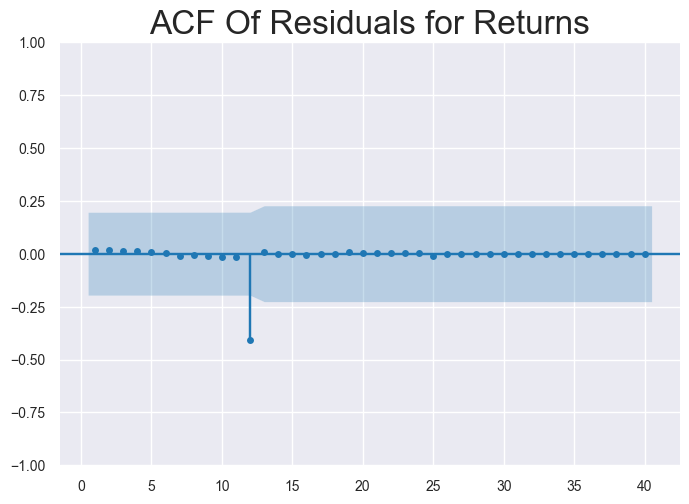

In [239]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

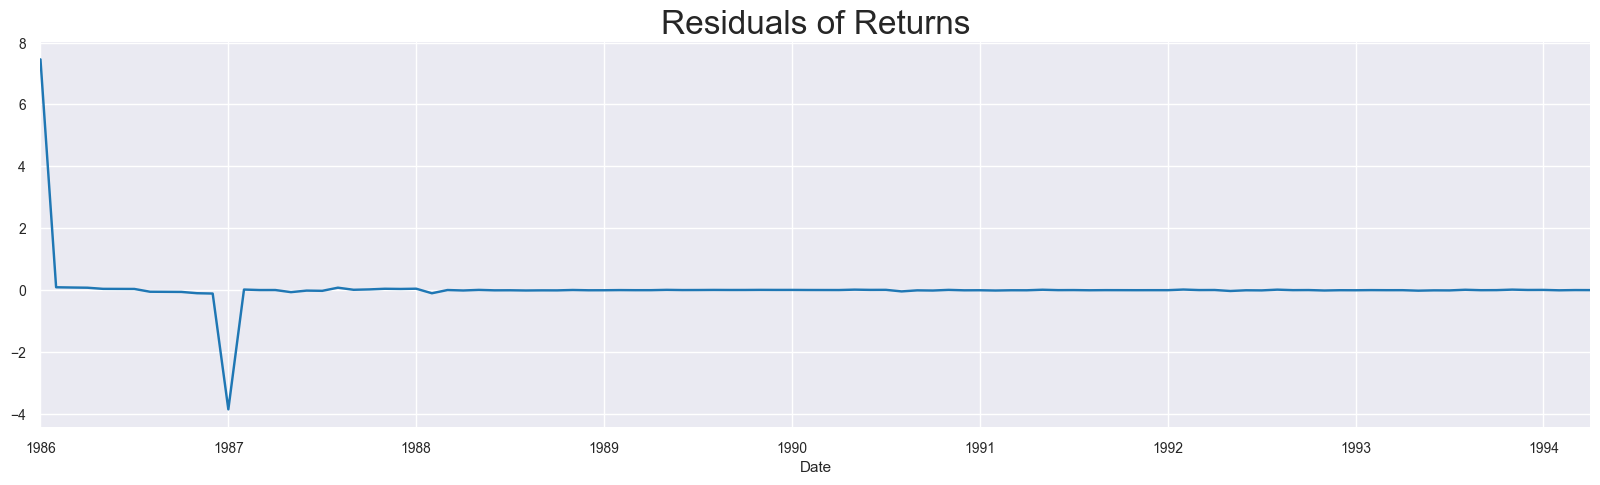

In [240]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

# Creating model with differente Transformation Technique


In [241]:
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_additive","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_multiplicative","ARIMA","SARIMA"]),\
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_arima,mape_SARIMA]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_ARIMA,rmse_SARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

Models    MAPE(%)  RMSE_Values
0          Triple_Exp_mul_ad   1.483298    78.384568
1  Triple_Exp_multiplicative   2.632781   168.843486
2                     SARIMA   3.940076   206.870000
3          Triple_Exp_ad_mul   5.157134   269.505419
4         Simple_Exponential   6.619719   381.954224
5                      ARIMA   8.863305   473.600000
6        Triple_Exp_additive  34.239442  1758.705554
7         Double_Exponential  89.700162  4560.457728

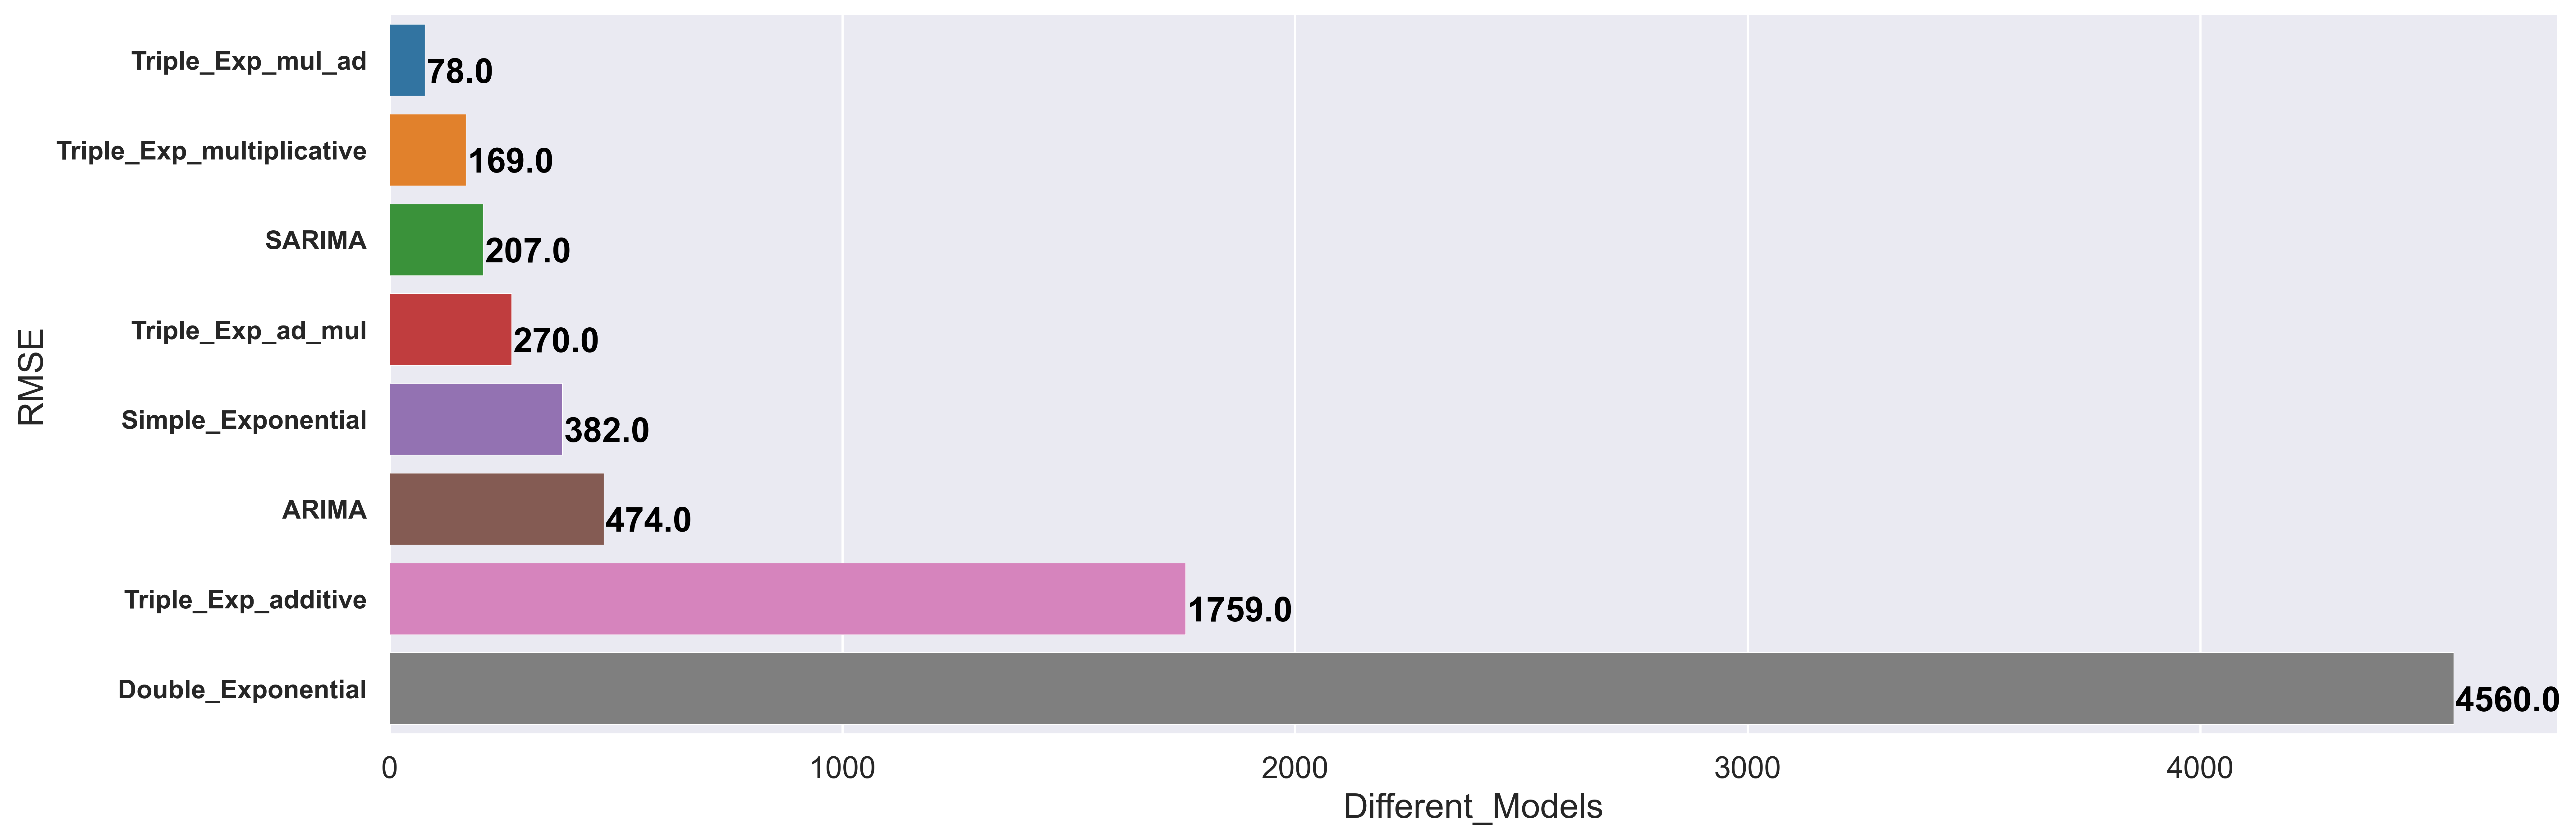

In [242]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sn.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()


# Best model we got so far is Triple Exponentila Addictive and multiplicative. 